# **Synthetic Dataset for Risk Assessment and Loan Approval Modeling**
This synthetic dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment. It serves two primary purposes:
The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

> *Risk Score Regression*: To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.

> *Binary Classification*: To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.


## Libraries

In [1]:
# for data wrangling
import numpy as np
import pandas as pd



# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,LabelEncoder

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,classification_report

from sklearn.model_selection import train_test_split

#models
# for regression algorithms
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


# for classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


from sklearn import model_selection
#from sklearn.utils import class_weight
#from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import svm
from sklearn import tree

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data

https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval/data

In [3]:
loan_df = pd.read_csv('/content/Loan.csv')
loan_df

FileNotFoundError: [Errno 2] No such file or directory: '/content/Loan.csv'

In [ ]:
# Create a copy of the original DataFrame
loan_df_original = loan_df.copy()


# Step 1. Understanding the data

In [ ]:
loan_df.shape

(20000, 36)

In [ ]:
print(f"The Loan Approval Dataset has {loan_df.shape[0]} occurences and {loan_df.shape[1]} features!")

The Loan Approval Dataset has 20000 occurences and 36 features!


In [ ]:
print("The features of the Dataset are:")

features = len(loan_df.columns)
features_list = [feature for feature in loan_df.columns]

for feature in features_list:
    print(feature)

The features of the Dataset are:
ApplicationDate
Age
AnnualIncome
CreditScore
EmploymentStatus
EducationLevel
Experience
LoanAmount
LoanDuration
MaritalStatus
NumberOfDependents
HomeOwnershipStatus
MonthlyDebtPayments
CreditCardUtilizationRate
NumberOfOpenCreditLines
NumberOfCreditInquiries
DebtToIncomeRatio
BankruptcyHistory
LoanPurpose
PreviousLoanDefaults
PaymentHistory
LengthOfCreditHistory
SavingsAccountBalance
CheckingAccountBalance
TotalAssets
TotalLiabilities
MonthlyIncome
UtilityBillsPaymentHistory
JobTenure
NetWorth
BaseInterestRate
InterestRate
MonthlyLoanPayment
TotalDebtToIncomeRatio
LoanApproved
RiskScore


Explanation of the features in the dataset:

1. **ApplicationDate**: The date when the loan application was submitted.
2. **Age**: The age of the loan applicant.
3. **AnnualIncome**: The yearly income of the applicant, typically used to evaluate loan repayment capacity.
4. **CreditScore**: A numerical representation of the applicant’s creditworthiness based on their credit history.
5. **EmploymentStatus**: The current employment status of the applicant (e.g., employed, unemployed, self-employed).
6. **EducationLevel**: The highest level of education attained by the applicant.
7. **Experience**: The number of years the applicant has been in their current occupation or field.
8. **LoanAmount**: The amount of money the applicant is requesting as a loan.
9. **LoanDuration**: The period (in months or years) over which the loan is to be repaid.
10. **MaritalStatus**: The marital status of the applicant (e.g., single, married, divorced).
11. **NumberOfDependents**: The number of people financially dependent on the applicant (e.g., children, elderly parents).
12. **HomeOwnershipStatus**: Whether the applicant owns, rents, or has other living arrangements regarding their home.
13. **MonthlyDebtPayments**: The total amount the applicant is currently paying each month toward their existing debts.
14. **CreditCardUtilizationRate**: The percentage of available credit being used by the applicant (credit card balance divided by total credit limit).
15. **NumberOfOpenCreditLines**: The number of active credit accounts the applicant has (e.g., credit cards, loans).
16. **NumberOfCreditInquiries**: The number of times a credit inquiry has been made on the applicant’s account (usually when applying for credit).
17. **DebtToIncomeRatio**: The ratio of the applicant’s total monthly debt payments to their monthly income, used to assess their ability to take on more debt.
18. **BankruptcyHistory**: Indicates whether the applicant has filed for bankruptcy in the past.
19. **LoanPurpose**: The reason why the applicant is seeking the loan (e.g., home improvement, education, medical).
20. **PreviousLoanDefaults**: The number of times the applicant has defaulted on previous loans.
21. **PaymentHistory**: A record of the applicant’s past payments on loans and credit lines.
22. **LengthOfCreditHistory**: The number of years the applicant has had active credit accounts.
23. **SavingsAccountBalance**: The amount of money in the applicant’s savings account.
24. **CheckingAccountBalance**: The amount of money in the applicant’s checking account.
25. **TotalAssets**: The total value of assets owned by the applicant (e.g., property, vehicles, investments).
26. **TotalLiabilities**: The total amount of liabilities (debts) the applicant owes.
27. **MonthlyIncome**: The applicant’s total monthly income.
28. **UtilityBillsPaymentHistory**: A record of how well the applicant has managed paying their utility bills.
29. **JobTenure**: The length of time the applicant has held their current job.
30. **NetWorth**: The difference between the applicant’s total assets and total liabilities.
31. **BaseInterestRate**: The general interest rate set by the financial institution or the market.
32. **InterestRate**: The specific interest rate offered to the applicant for the loan.
33. **MonthlyLoanPayment**: The amount the applicant will need to pay each month to repay the loan.
34. **TotalDebtToIncomeRatio**: A more comprehensive debt-to-income ratio that includes all of the applicant’s liabilities.
35. **LoanApproved**: Indicates whether the loan was approved or not (usually binary: Yes/No).
36. **RiskScore**: A score representing the risk level of the applicant, usually derived from various financial and personal factors to help determine loan approval and interest rate.

These features help in assessing the financial health, creditworthiness, and risk profile of the loan applicant, which ultimately determines loan approval, terms, and interest rates.

## Feature  wise Data Analysis

In [ ]:
from typing import List

def display_cols_value_counts(col_names: List[str]):
    for col_name in col_names:
        print('-'*30)
        print(f"Column: {col_name}")           #column name subtitles
        print('-'*30)
        print("The datatype:", loan_df[col_name].dtypes)                      #the datatype of the feature
        print("The number of null values:", loan_df[col_name].isnull().sum())  # Display number of null values
        print(loan_df[col_name].describe())                                   #feature description
        print(" ")



        # Check if the unique values in the column are less than 10 to display frequency tables
        if loan_df[col_name].nunique() < 10:
            print("There are",loan_df[col_name].nunique(), "unique values.")
            print("The frequency table:")
            print(loan_df[col_name].value_counts())
        else:
            print("(Frequency table not displayed, there are",loan_df[col_name].nunique(), "unique values).")

        print('')


display_cols_value_counts(loan_df.columns)


------------------------------
Column: ApplicationDate
------------------------------
The datatype: object
The number of null values: 0
count          20000
unique         20000
top       2072-09-17
freq               1
Name: ApplicationDate, dtype: object
 
(Frequency table not displayed, there are 20000 unique values).

------------------------------
Column: Age
------------------------------
The datatype: int64
The number of null values: 0
count    20000.000000
mean        39.752600
std         11.622713
min         18.000000
25%         32.000000
50%         40.000000
75%         48.000000
max         80.000000
Name: Age, dtype: float64
 
(Frequency table not displayed, there are 63 unique values).

------------------------------
Column: AnnualIncome
------------------------------
The datatype: int64
The number of null values: 0
count     20000.000000
mean      59161.473550
std       40350.845168
min       15000.000000
25%       31679.000000
50%       48566.000000
75%       74391.0

In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

* Integer - 21
* Decimal - 9
* String - 5

In [ ]:
loan_df.isnull().sum().sum()

np.int64(0)

In [ ]:
loan_df.duplicated().sum()

np.int64(0)

The data has no missing/duplicate values

## (1.1) Categorical Columns


In [ ]:
categorical_columns = loan_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical Columns:", categorical_columns)

Categorical Columns: ['ApplicationDate', 'EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


In [ ]:
loan_df.describe(include=['O']).T

,count,unique,top,freq
ApplicationDate,20000,20000,2072-09-17,1
EmploymentStatus,20000,3,Employed,17036
EducationLevel,20000,5,Bachelor,6054
MaritalStatus,20000,4,Married,10041
HomeOwnershipStatus,20000,4,Mortgage,7939
LoanPurpose,20000,5,Home,5925


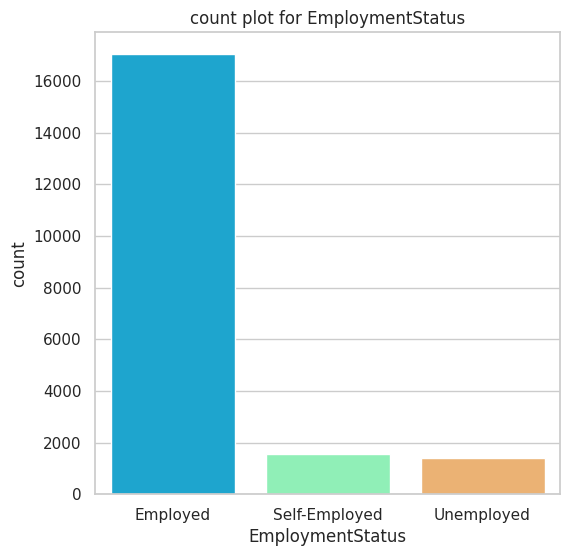

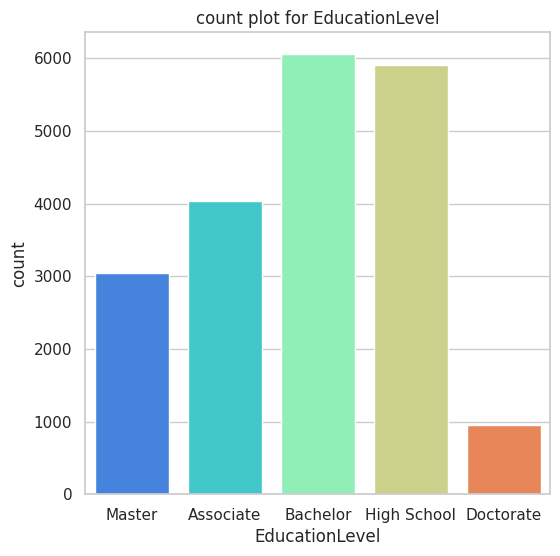

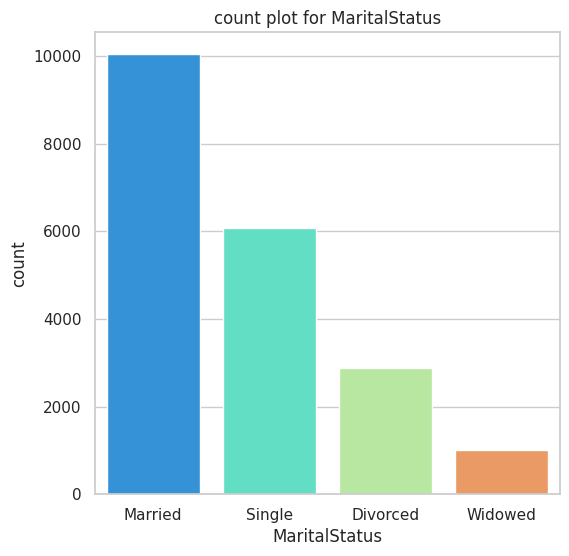

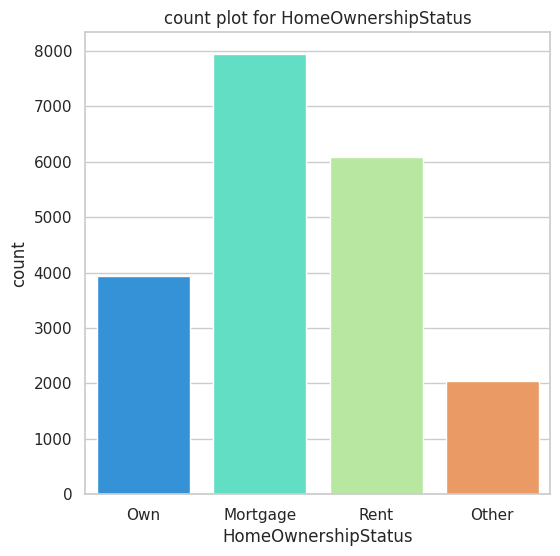

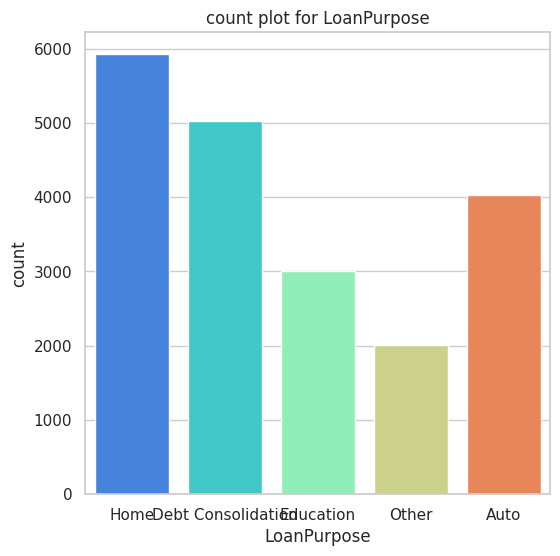

In [ ]:
for col in categorical_columns[1:]:  # Skip the first feature
    plt.figure(figsize=(6,6))
    sns.countplot(data=loan_df, x=col , hue=col, palette='rainbow')
    plt.title(f"count plot for {col}")
    plt.show()

Most of the loan needed persons are
* Employed
* Married
* Comparatively less educated
* Need loan for building home.


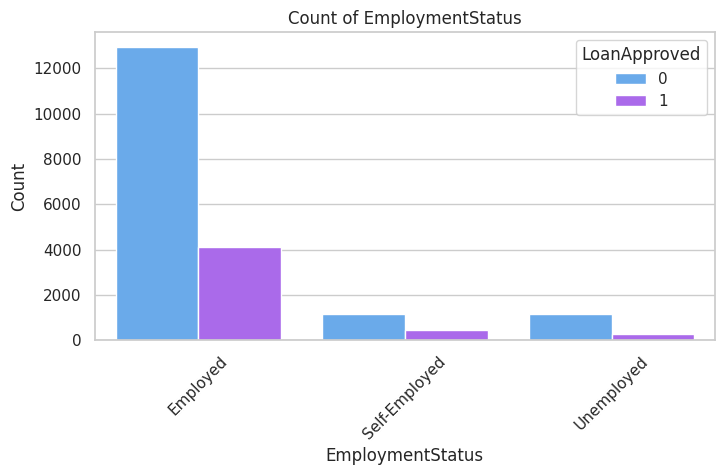

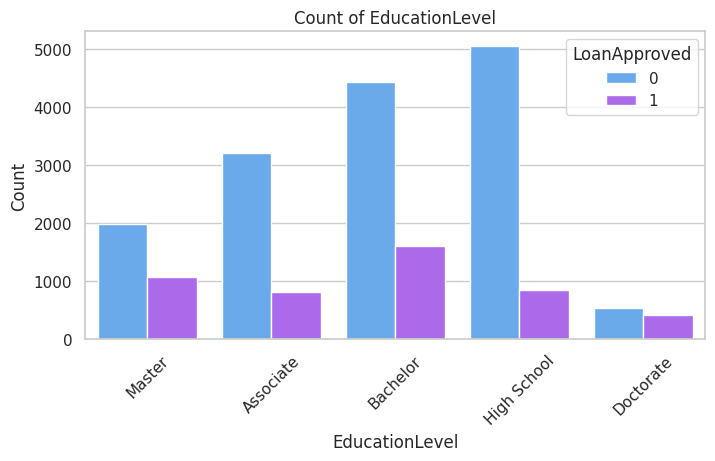

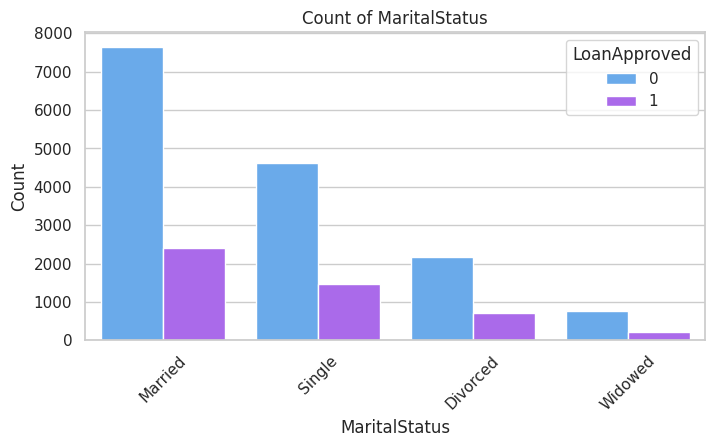

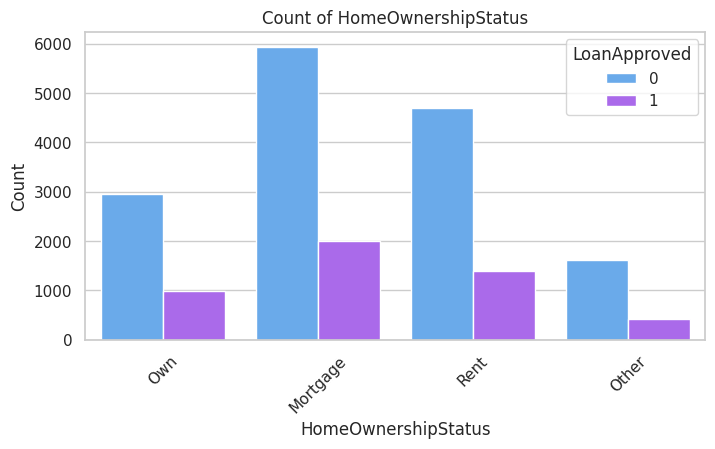

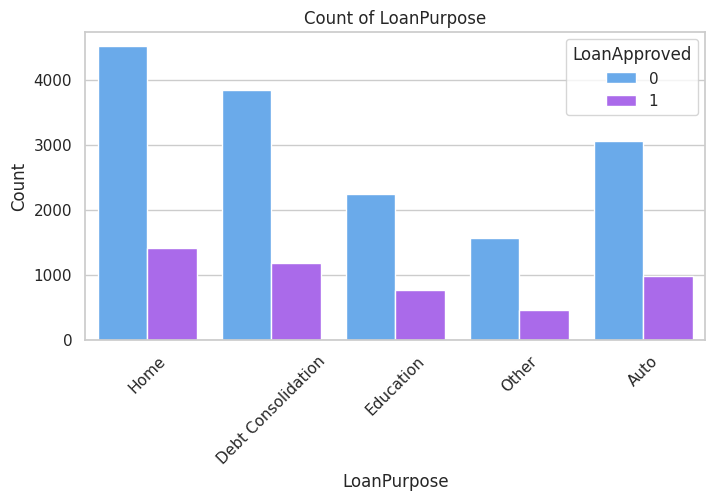

In [ ]:
# Plot countplots for each categorical column
for col in categorical_columns[1:]:  # Skip the first feature
    plt.figure(figsize=(8, 4))
    sns.countplot(data=loan_df, x=col, palette='cool',hue='LoanApproved')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Majority of loan requests are rejected in all categories(There might be some other reason affecting the riskscore).

## (1.2) Numerical Columns

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = loan_df.select_dtypes(include=numerics).columns.tolist()

print("Numerical Columns:", numerical_columns)

Numerical Columns: ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']


In [ ]:
# Numerical columns
#'Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'


In [ ]:
loan_df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


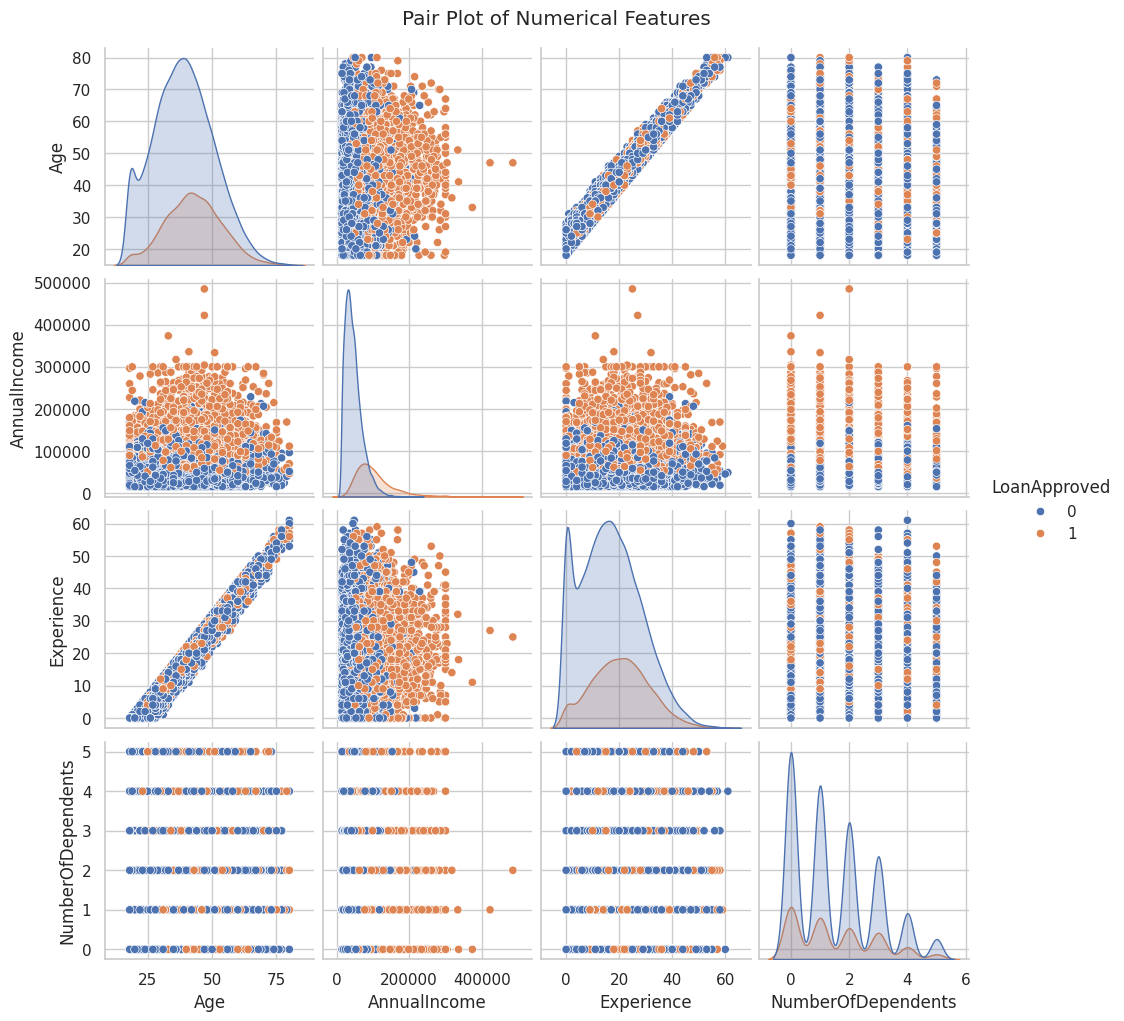

In [ ]:
# Multivariate analysis: Pair plot of numerical features(personal details)
sns.pairplot(loan_df[['Age', 'AnnualIncome', 'Experience','NumberOfDependents','LoanApproved']], hue='LoanApproved')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

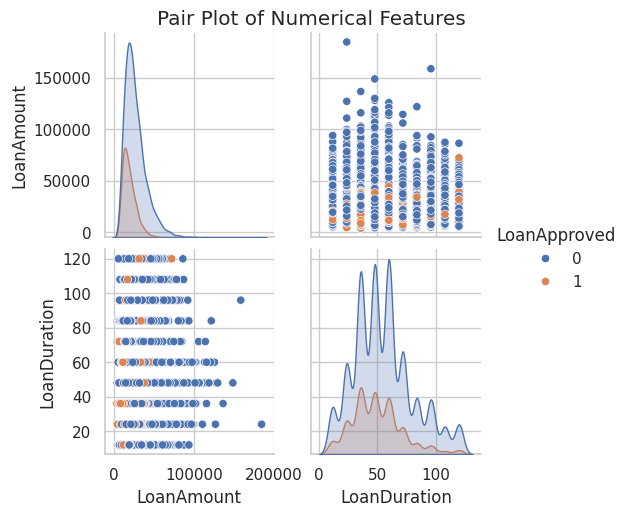

In [ ]:
# Multivariate analysis: Pair plot of numerical features(Loan details)
sns.pairplot(loan_df[['LoanAmount', 'LoanDuration','LoanApproved']], hue='LoanApproved')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

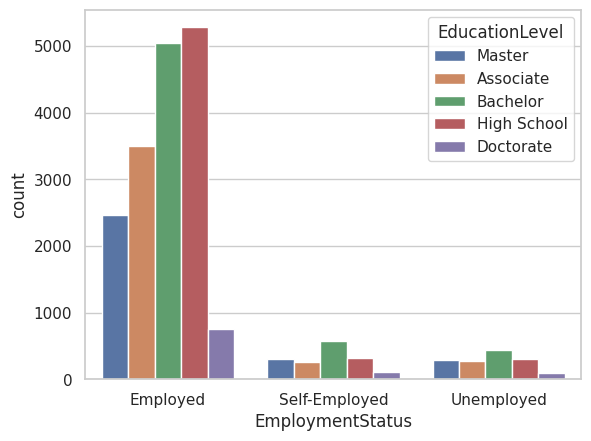

In [ ]:
sns.countplot(x='EmploymentStatus',hue='EducationLevel', data=loan_df)
plt.show()

## (1.3) Target Variable - y

* **Risk Score**: To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.
* **Loan Approval**: To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

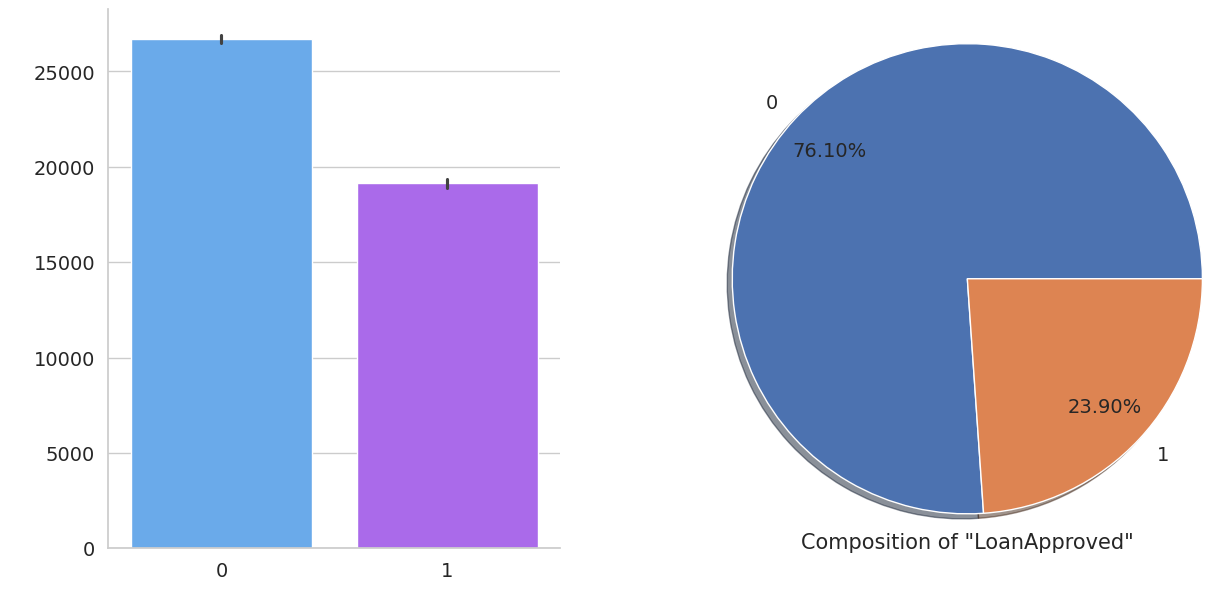

In [ ]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.barplot(x='LoanApproved', y='LoanAmount', data=loan_df, palette='cool' )
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)

# pieplot
ax2= plt.subplot(1,2,2)
plt.pie(x=loan_df['LoanApproved'].value_counts(),
        labels=list(loan_df['LoanApproved'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
ax2.set_xlabel(" ")
plt.xlabel('Composition of "LoanApproved"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

No need of Sampling since there are only two categories in the target column.

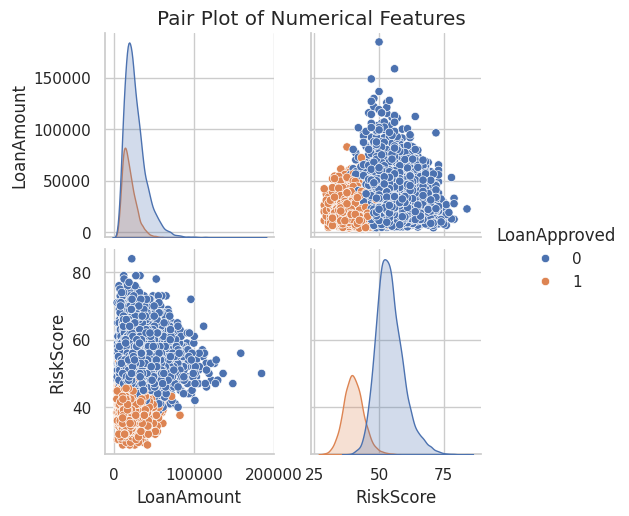

In [ ]:
# Multivariate analysis: Pair plot of numerical features(personal details)
sns.pairplot(loan_df[['LoanAmount','RiskScore','LoanApproved']], hue='LoanApproved')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

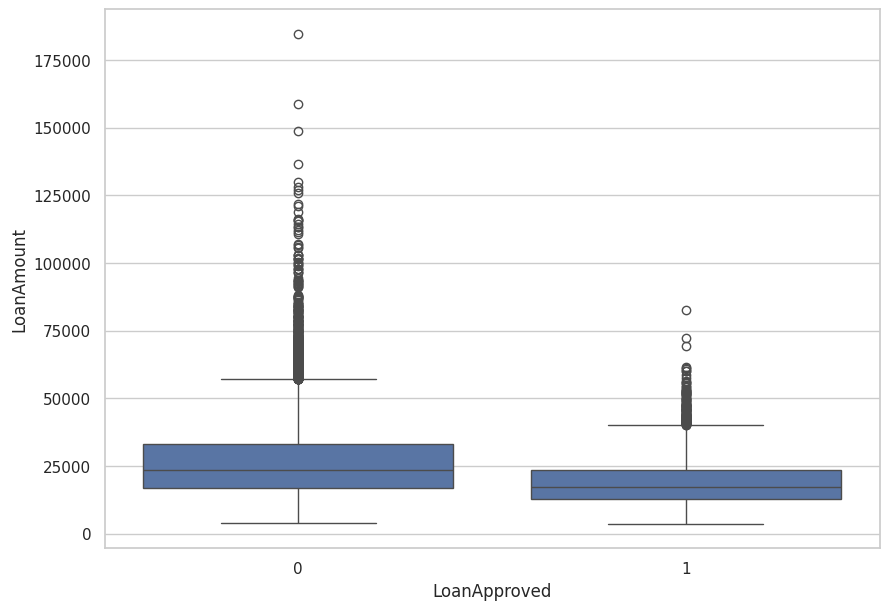

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=loan_df, x='LoanApproved', y='LoanAmount')
plt.show()

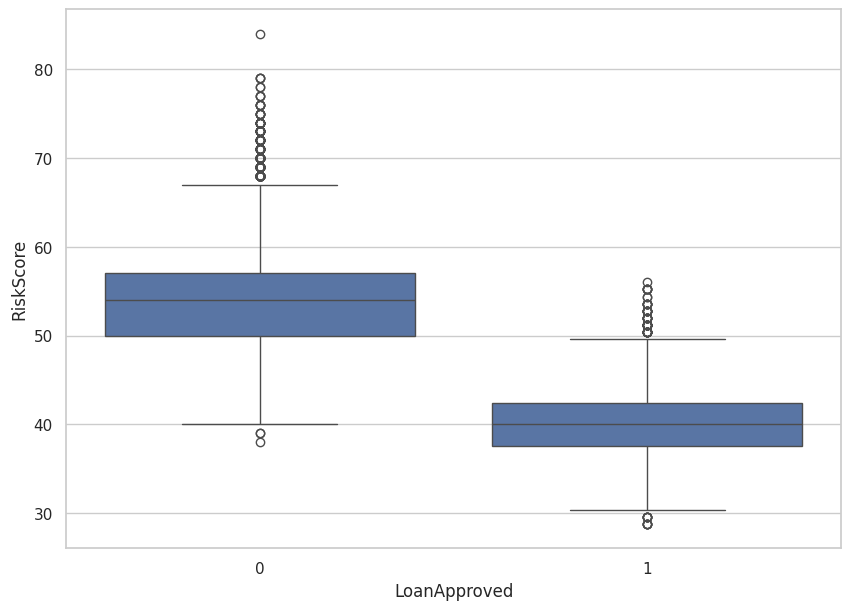

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=loan_df, x='LoanApproved', y='RiskScore')
plt.show()

# Step 2. Data Cleaning

## (2.1) Handling Null/duplicates values



No null values and no duplicates

## (2.2) Encoding

In [ ]:
categorical_columns = loan_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical Columns:", categorical_columns)

Categorical Columns: ['ApplicationDate', 'EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


### (2.2.1) Ordinal Data

> Many machine learning models, like decision trees and regression models, rely on the relative order of numeric values. By manually assigning meaningful numbers, the model can better capture the relationship between the ordinal categories.



In [ ]:
loan_df['EmploymentStatus'].unique()

array(['Employed', 'Self-Employed', 'Unemployed'], dtype=object)

In [ ]:
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].map({'Unemployed': 0,'Self-Employed':1,'Employed': 2})

In [ ]:
loan_df['EmploymentStatus'].unique()

array([2, 1, 0])

In [ ]:
loan_df['EducationLevel'].unique()

array(['Master', 'Associate', 'Bachelor', 'High School', 'Doctorate'],
      dtype=object)

In [ ]:
loan_df['EducationLevel'] = loan_df['EducationLevel'].map({'High School': 0,
                                                            'Associate':1,
                                                           'Bachelor': 2,
                                                           'Master':3,
                                                          'Doctorate': 4})

In [ ]:
loan_df['EducationLevel'].unique()

array([3, 1, 2, 0, 4])

In [ ]:
ownership_map = {
    'Rent': 0,
    'Other': 1,
    'Mortgage': 2,
    'Own': 3
}
loan_df['HomeOwnershipStatus'] = loan_df['HomeOwnershipStatus'].map(ownership_map)


### (2.2.2) Nominal Data

> Target Encoding

In [ ]:
target_mean = loan_df.groupby('MaritalStatus')['RiskScore'].mean()
loan_df['MaritalStatus'] = loan_df['MaritalStatus'].map(target_mean)


> Frequency Encoding

In [ ]:
freq_enc = loan_df['LoanPurpose'].value_counts(normalize=True)
loan_df['LoanPurpose'] = loan_df['LoanPurpose'].map(freq_enc)

> LabelEncoder

In [ ]:
#le = LabelEncoder()

# Exclude the 'ApplicationDate' column
#for cols in loan_df.select_dtypes('object').columns:
    #if cols != 'ApplicationDate':
        #loan_df[cols] = le.fit_transform(loan_df[cols])


In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  int64  
 5   EducationLevel              20000 non-null  int64  
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  float64
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  int64  
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [ ]:
existing_columns = loan_df.columns.intersection(loan_df_original.columns)
categorical_columns = loan_df_original[existing_columns].select_dtypes(include=['object', 'category']).columns.tolist()
# Define target columns to exclude
target_columns = ['LoanApproved', 'RiskScore']

# Select numeric columns, excluding categorical and target columns
numeric_columns = loan_df.drop(columns=categorical_columns + target_columns).select_dtypes(include=['number'])


## (2.3) Feature Engineering

> (1)

In [ ]:
mismatch_count = ((loan_df['MonthlyIncome'] - (loan_df['AnnualIncome'] / 12)).abs() > 1).sum()
print(f"Number of mismatched rows: {mismatch_count}")

total_rows = len(loan_df)
print(f"Percentage of mismatching rows: {mismatch_count / total_rows * 100:.2f}%")

loan_df[['AnnualIncome', 'MonthlyIncome']].corr()


Number of mismatched rows: 195
Percentage of mismatching rows: 0.97%


,AnnualIncome,MonthlyIncome
AnnualIncome,1.000000,0.989911
MonthlyIncome,0.989911,1.000000


In [ ]:
loan_df.drop(['AnnualIncome'], axis=1, inplace=True)

> (2) NetWorth

In [ ]:
mismatch_count = ((loan_df['NetWorth'] - (loan_df['TotalAssets'] - loan_df['TotalLiabilities'])).abs() > 1).sum()
print(f"Number of mismatched rows: {mismatch_count}")

total_rows = len(loan_df)
print(f"Percentage of mismatching rows: {mismatch_count / total_rows * 100:.2f}%")

loan_df[['NetWorth', 'TotalAssets','TotalLiabilities']].corr()

Number of mismatched rows: 4801
Percentage of mismatching rows: 24.01%


,NetWorth,TotalAssets,TotalLiabilities
NetWorth,1.000000,0.978997,-0.129962
TotalAssets,0.978997,1.000000,-0.000276
TotalLiabilities,-0.129962,-0.000276,1.000000


In [ ]:
loan_df.drop(['TotalAssets','TotalLiabilities'], axis=1, inplace=True)

> (3) TotalAccountBalance

In [ ]:
loan_df['BankBalance']=loan_df['SavingsAccountBalance']+loan_df['CheckingAccountBalance']

loan_df.drop('SavingsAccountBalance', axis=1, inplace=True)
loan_df.drop('CheckingAccountBalance', axis=1, inplace=True)

> (4) Age Binning

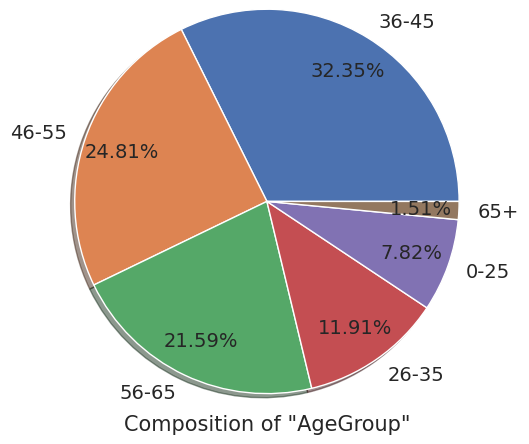

In [ ]:
# Age Binning
loan_df['AgeGroup'] = pd.cut(loan_df['Age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['0-25', '26-35', '36-45', '46-55', '56-65', '65+'])


plt.pie(x=loan_df['AgeGroup'].value_counts(),
labels=list(loan_df['AgeGroup'].unique()),
autopct='%2.2f%%',
pctdistance=0.8,
shadow=True,
radius=1.3,
textprops={'fontsize':14})
plt.xlabel('Composition of "AgeGroup"', fontsize=15, labelpad=20)
plt.show()

In [ ]:
loan_df.drop('AgeGroup', axis=1, inplace=True)

> (5) Date of Application

In [ ]:
loan_df[['year', 'month', 'day']] = loan_df['ApplicationDate'].str.split('-', expand=True)

loan_df['year'] = loan_df['year'].astype(int)
loan_df['month'] = loan_df['month'].astype(int)
loan_df['day'] = loan_df['day'].astype(int)

loan_df[['ApplicationDate','year', 'month', 'day']]

,ApplicationDate,year,month,day
0,2018-01-01,2018,1,1
1,2018-01-02,2018,1,2
2,2018-01-03,2018,1,3
3,2018-01-04,2018,1,4
4,2018-01-05,2018,1,5
...,...,...,...,...
19995,2072-09-29,2072,9,29
19996,2072-09-30,2072,9,30
19997,2072-10-01,2072,10,1
19998,2072-10-02,2072,10,2


In [ ]:
loan_df['year'].max()

2072

In [ ]:
# the ApplicationDate feature have errors. So drop it
loan_df.drop(['ApplicationDate','year', 'month', 'day'], axis=1, inplace=True)

> (6)

In [ ]:
dti_difference = (loan_df['DebtToIncomeRatio'] - (loan_df['MonthlyDebtPayments'] / loan_df['MonthlyIncome'])).abs()
mismatch_count = (dti_difference > 1).sum()
print(f"Number of mismatched rows: {mismatch_count}")

match_percentage = ((dti_difference <1).sum() / len(loan_df)) * 100
print(f"Percentage of rows where DTI matches formula: {match_percentage:.2f}%")


Number of mismatched rows: 2
Percentage of rows where DTI matches formula: 99.99%


In [ ]:
dti_difference = (loan_df['TotalDebtToIncomeRatio'] - (loan_df['MonthlyDebtPayments'] / loan_df['MonthlyIncome'])).abs()
mismatch_count = (dti_difference > 1).sum()
print(f"Number of mismatched rows: {mismatch_count}")

match_percentage = ((dti_difference <1).sum() / len(loan_df)) * 100
print(f"Percentage of rows where DTI matches formula: {match_percentage:.2f}%")

Number of mismatched rows: 510
Percentage of rows where DTI matches formula: 97.45%


In [ ]:
loan_df.drop(['DebtToIncomeRatio','TotalDebtToIncomeRatio'], axis=1, inplace=True)

In [ ]:
# More realistic interest rate based on credit score, loan amount, and loan duration
#df['BaseInterestRate'] = 0.03 + (850 - df['CreditScore']) / 2000 + df['LoanAmount'] / 1000000 + df['LoanDuration'] / 1200
#df['InterestRate'] = df['BaseInterestRate'] * (1 + np.random.normal(0, 0.1, num_samples)).clip(0.8, 1.2)

#df['MonthlyLoanPayment'] = (df['LoanAmount'] * (df['InterestRate']/12)) / (1 - (1 + df['InterestRate']/12)**(-df['LoanDuration']))
#df['TotalDebtToIncomeRatio'] = (df['MonthlyDebtPayments'] + df['MonthlyLoanPayment']) / df['MonthlyIncome']


In [ ]:
loan_df.shape

(20000, 29)

# Data Transformations

In [ ]:
# Use only columns that are present in both loan_df and loan_df_original
existing_columns = loan_df.columns.intersection(loan_df_original.columns)
categorical_columns = loan_df_original[existing_columns].select_dtypes(include=['object', 'category']).columns.tolist()

# Define target columns to exclude (check if they still exist in df)
target_columns = [col for col in ['LoanApproved', 'RiskScore'] if col in loan_df.columns]

# Select numeric columns excluding categorical and target columns
exclude_columns = categorical_columns + target_columns
numeric_columns = loan_df.drop(columns=exclude_columns, errors='ignore').select_dtypes(include=['number'])

numeric_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   CreditScore                 20000 non-null  int64  
 2   Experience                  20000 non-null  int64  
 3   LoanAmount                  20000 non-null  int64  
 4   LoanDuration                20000 non-null  int64  
 5   NumberOfDependents          20000 non-null  int64  
 6   MonthlyDebtPayments         20000 non-null  int64  
 7   CreditCardUtilizationRate   20000 non-null  float64
 8   NumberOfOpenCreditLines     20000 non-null  int64  
 9   NumberOfCreditInquiries     20000 non-null  int64  
 10  BankruptcyHistory           20000 non-null  int64  
 11  PreviousLoanDefaults        20000 non-null  int64  
 12  PaymentHistory              20000 non-null  int64  
 13  LengthOfCreditHistory       200

## (2.4) Skewed Data

> Histograms

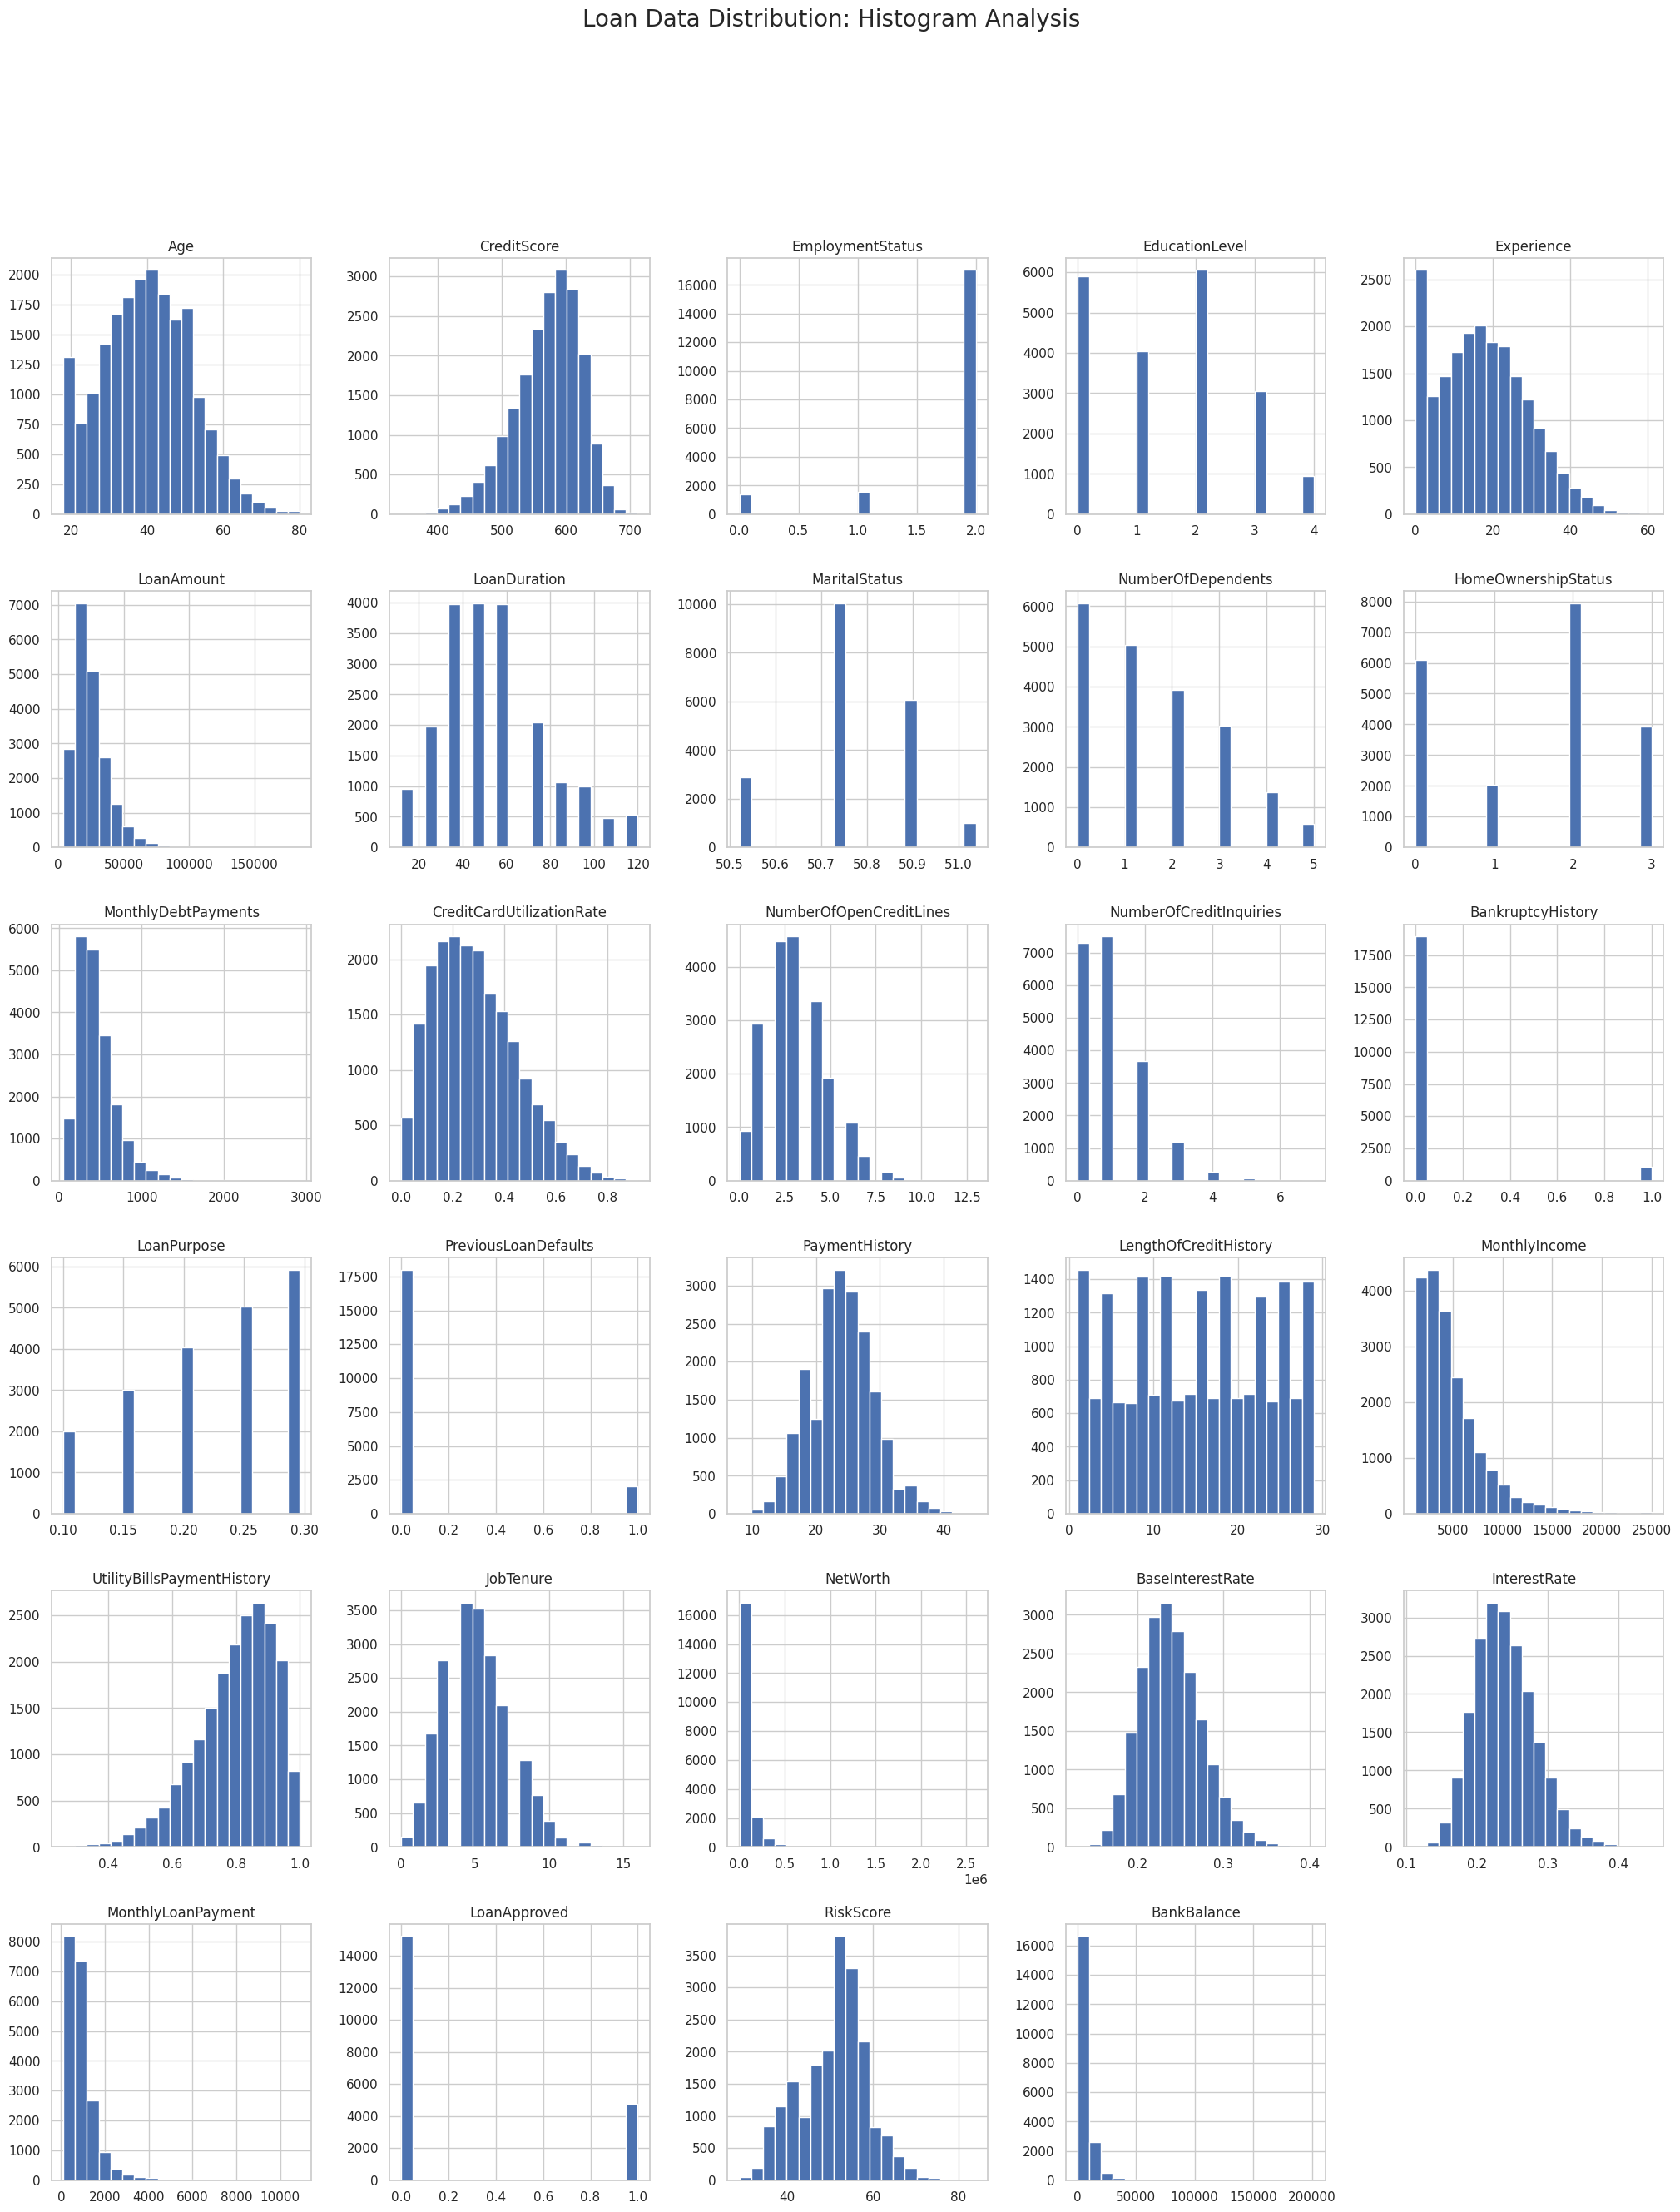

In [ ]:
loan_df.hist(bins=20, figsize=(25,30))
plt.suptitle('Loan Data Distribution: Histogram Analysis', fontsize=20)
plt.show()

In [ ]:
# Calculate skewness for each column
skewness = numeric_columns.skew()

# Sort the skewness values in ascending order
sorted_skewness = skewness.sort_values(ascending=True)

# Display the sorted skewness values
print(sorted_skewness)

UtilityBillsPaymentHistory   -0.846234
CreditScore                  -0.596727
LengthOfCreditHistory         0.002989
Age                           0.185964
PaymentHistory                0.213465
Experience                    0.339981
JobTenure                     0.436452
BaseInterestRate              0.461850
InterestRate                  0.485491
NumberOfOpenCreditLines       0.599662
CreditCardUtilizationRate     0.601131
NumberOfDependents            0.639919
LoanDuration                  0.651330
NumberOfCreditInquiries       1.012065
MonthlyDebtPayments           1.653435
LoanAmount                    1.833688
MonthlyIncome                 1.992929
PreviousLoanDefaults          2.665941
MonthlyLoanPayment            3.081845
BankruptcyHistory             4.017672
BankBalance                   5.264327
NetWorth                      5.599844
dtype: float64


> Example:

In [ ]:
# Log Transformation of skewed columns (e.g., AnnualIncome, LoanAmount)
loan_df['MonthlyIncome'] = np.log1p(loan_df['MonthlyIncome'])  # log(1 + x) to handle 0 values
loan_df['LoanAmount'] = np.log1p(loan_df['LoanAmount'])



The log1p function in NumPy stands for log(1 + x), where "1p" refers to adding 1 to the input value before taking the logarithm.

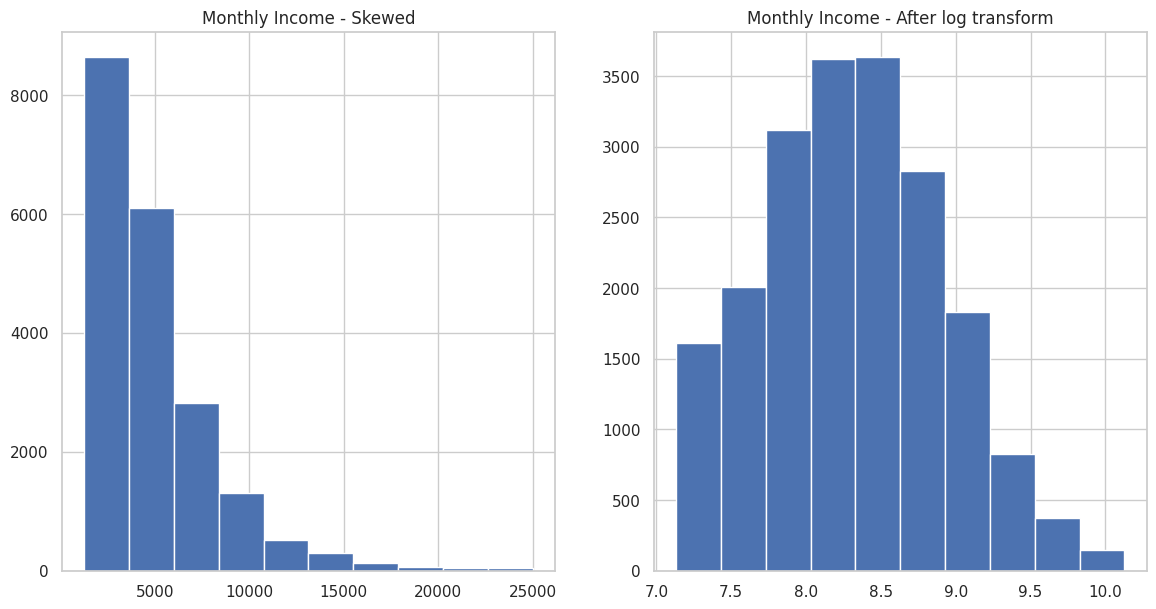

In [ ]:
plt.figure(figsize=(14,7))
#
ax1 = plt.subplot(1,2,1)
cp = plt.hist(loan_df_original['MonthlyIncome'])
plt.title("Monthly Income - Skewed")
#
ax2= plt.subplot(1,2,2)
plt.hist(loan_df['MonthlyIncome'])
plt.title("Monthly Income - After log transform")
plt.show()

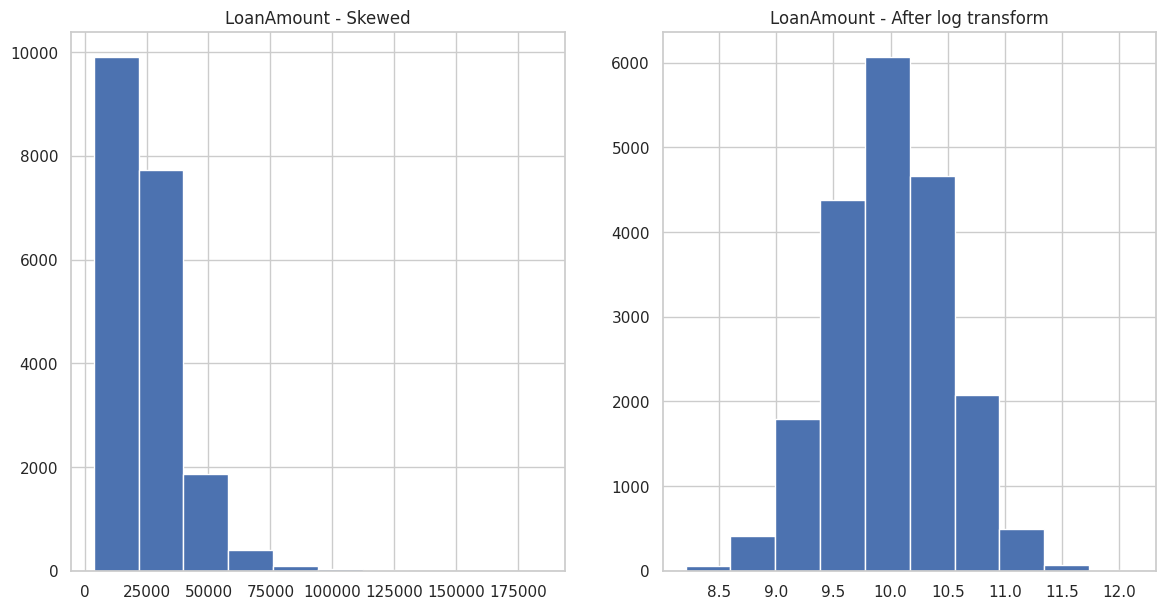

In [ ]:
plt.figure(figsize=(14,7))
#
ax1 = plt.subplot(1,2,1)
cp = plt.hist(loan_df_original['LoanAmount'])
plt.title("LoanAmount - Skewed")
#
ax2= plt.subplot(1,2,2)
plt.hist(loan_df['LoanAmount'])
plt.title("LoanAmount - After log transform")
plt.show()

> handling all skewed columns

In [ ]:
# Calculate skewness for numeric columns
skewness = numeric_columns.skew()

# Identify columns with high skewness (threshold > 1 or < -1)
highly_skewed_columns = skewness[abs(skewness) > 1].index

# Apply log transformation using np.log1p() for columns with high skewness
for col in highly_skewed_columns:
    loan_df[col] = np.log1p(loan_df[col])

# Print transformed columns
print("Log-transformed columns:")
print(highly_skewed_columns.tolist())

# Preview the updated DataFrame
loan_df.head()


Log-transformed columns:
['LoanAmount', 'MonthlyDebtPayments', 'NumberOfCreditInquiries', 'BankruptcyHistory', 'PreviousLoanDefaults', 'MonthlyIncome', 'NetWorth', 'MonthlyLoanPayment', 'BankBalance']


,Age,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,LoanApproved,RiskScore,BankBalance
0,45,617,2,3,22,2.349889,48,50.735843,2,3,...,2.209453,0.724972,11,11.751383,0.199652,0.227590,6.042172,0,49.0,9.086476
1,38,628,2,1,15,2.413018,48,50.889668,1,2,...,2.208794,0.935132,3,10.683042,0.207045,0.201077,6.678410,0,52.0,8.998137
2,47,570,2,2,26,2.377437,36,50.735843,2,0,...,2.211561,0.872241,6,8.557567,0.217627,0.212548,6.503400,0,52.0,7.485492
3,58,545,2,0,34,2.446051,96,50.889668,1,2,...,2.267822,0.896155,5,11.507440,0.300398,0.300911,6.955123,0,54.0,7.970049
4,37,594,2,1,17,2.315040,36,50.735843,1,2,...,2.308592,0.941369,5,12.332793,0.197184,0.175990,5.802659,1,36.0,8.785234


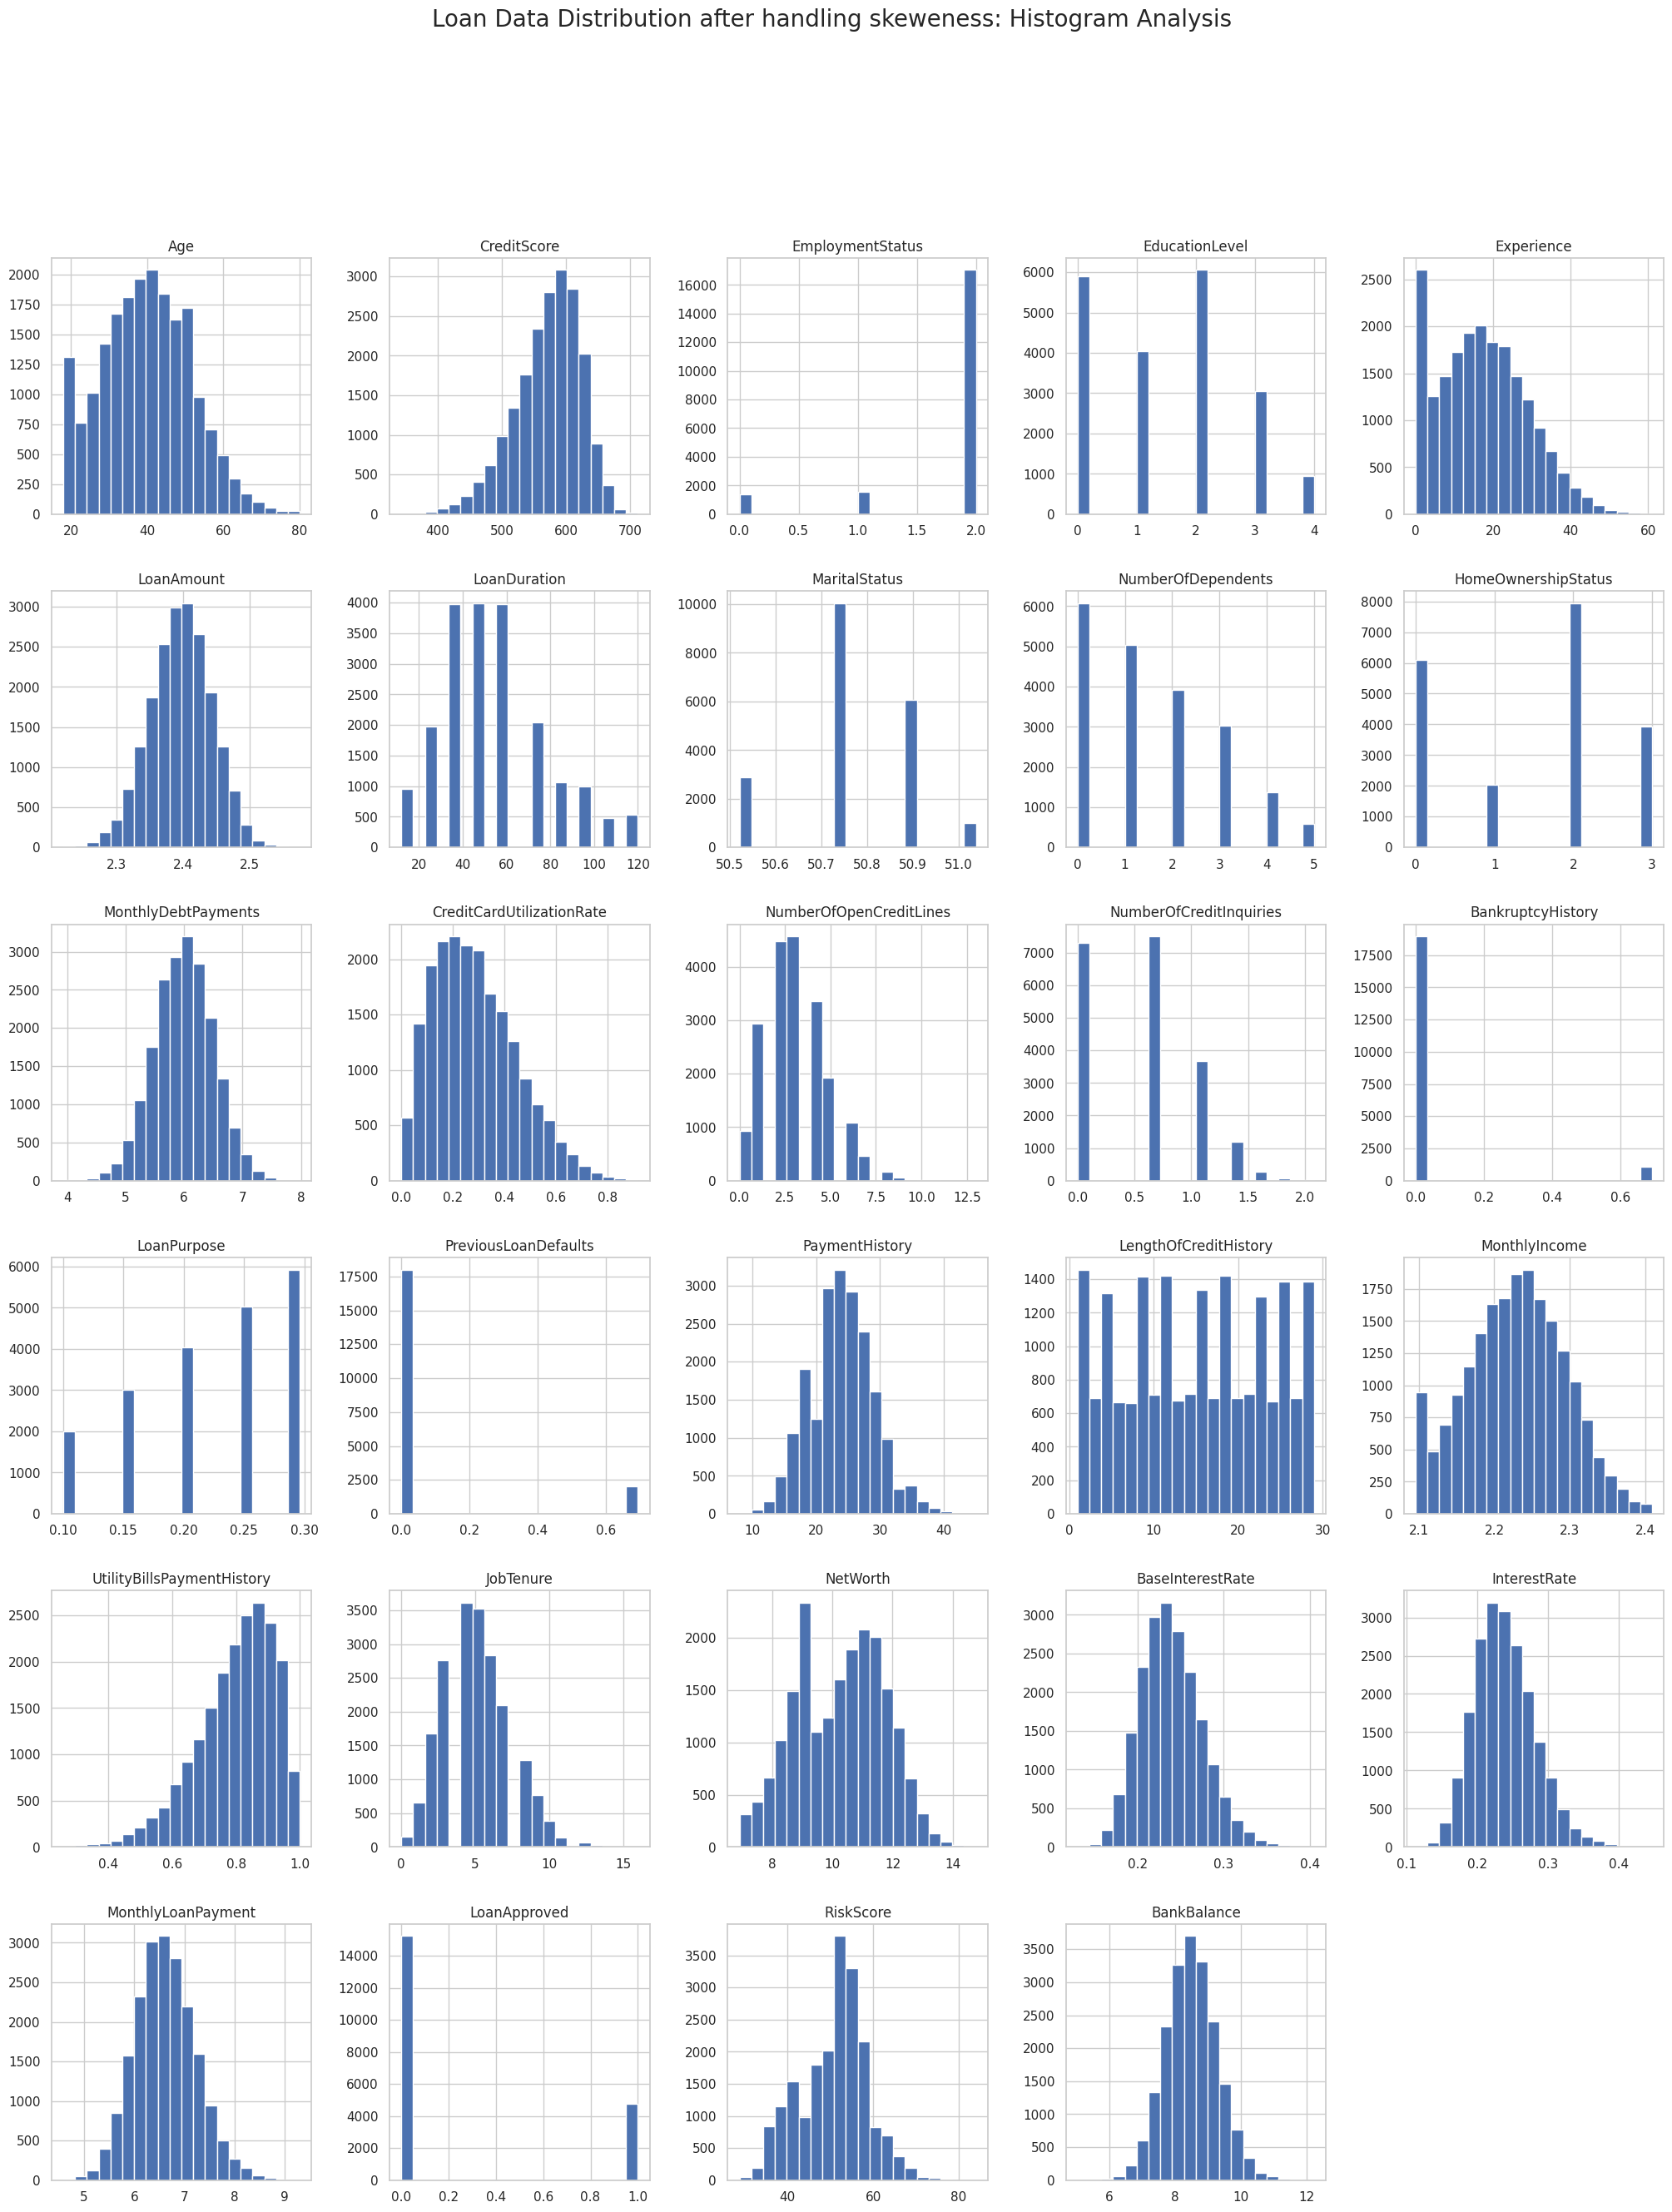

In [ ]:
loan_df.hist(bins=20, figsize=(25,30))
plt.suptitle('Loan Data Distribution after handling skeweness: Histogram Analysis', fontsize=20)
plt.show()

## (2.5) Removing Unwanted features

### (2.5.1) Based on Correlation

> After analyzing the correlations, you can remove:
- One among two Highly correlated features (between features themselves).
- Features with low correlation with the target variable.



<Axes: >

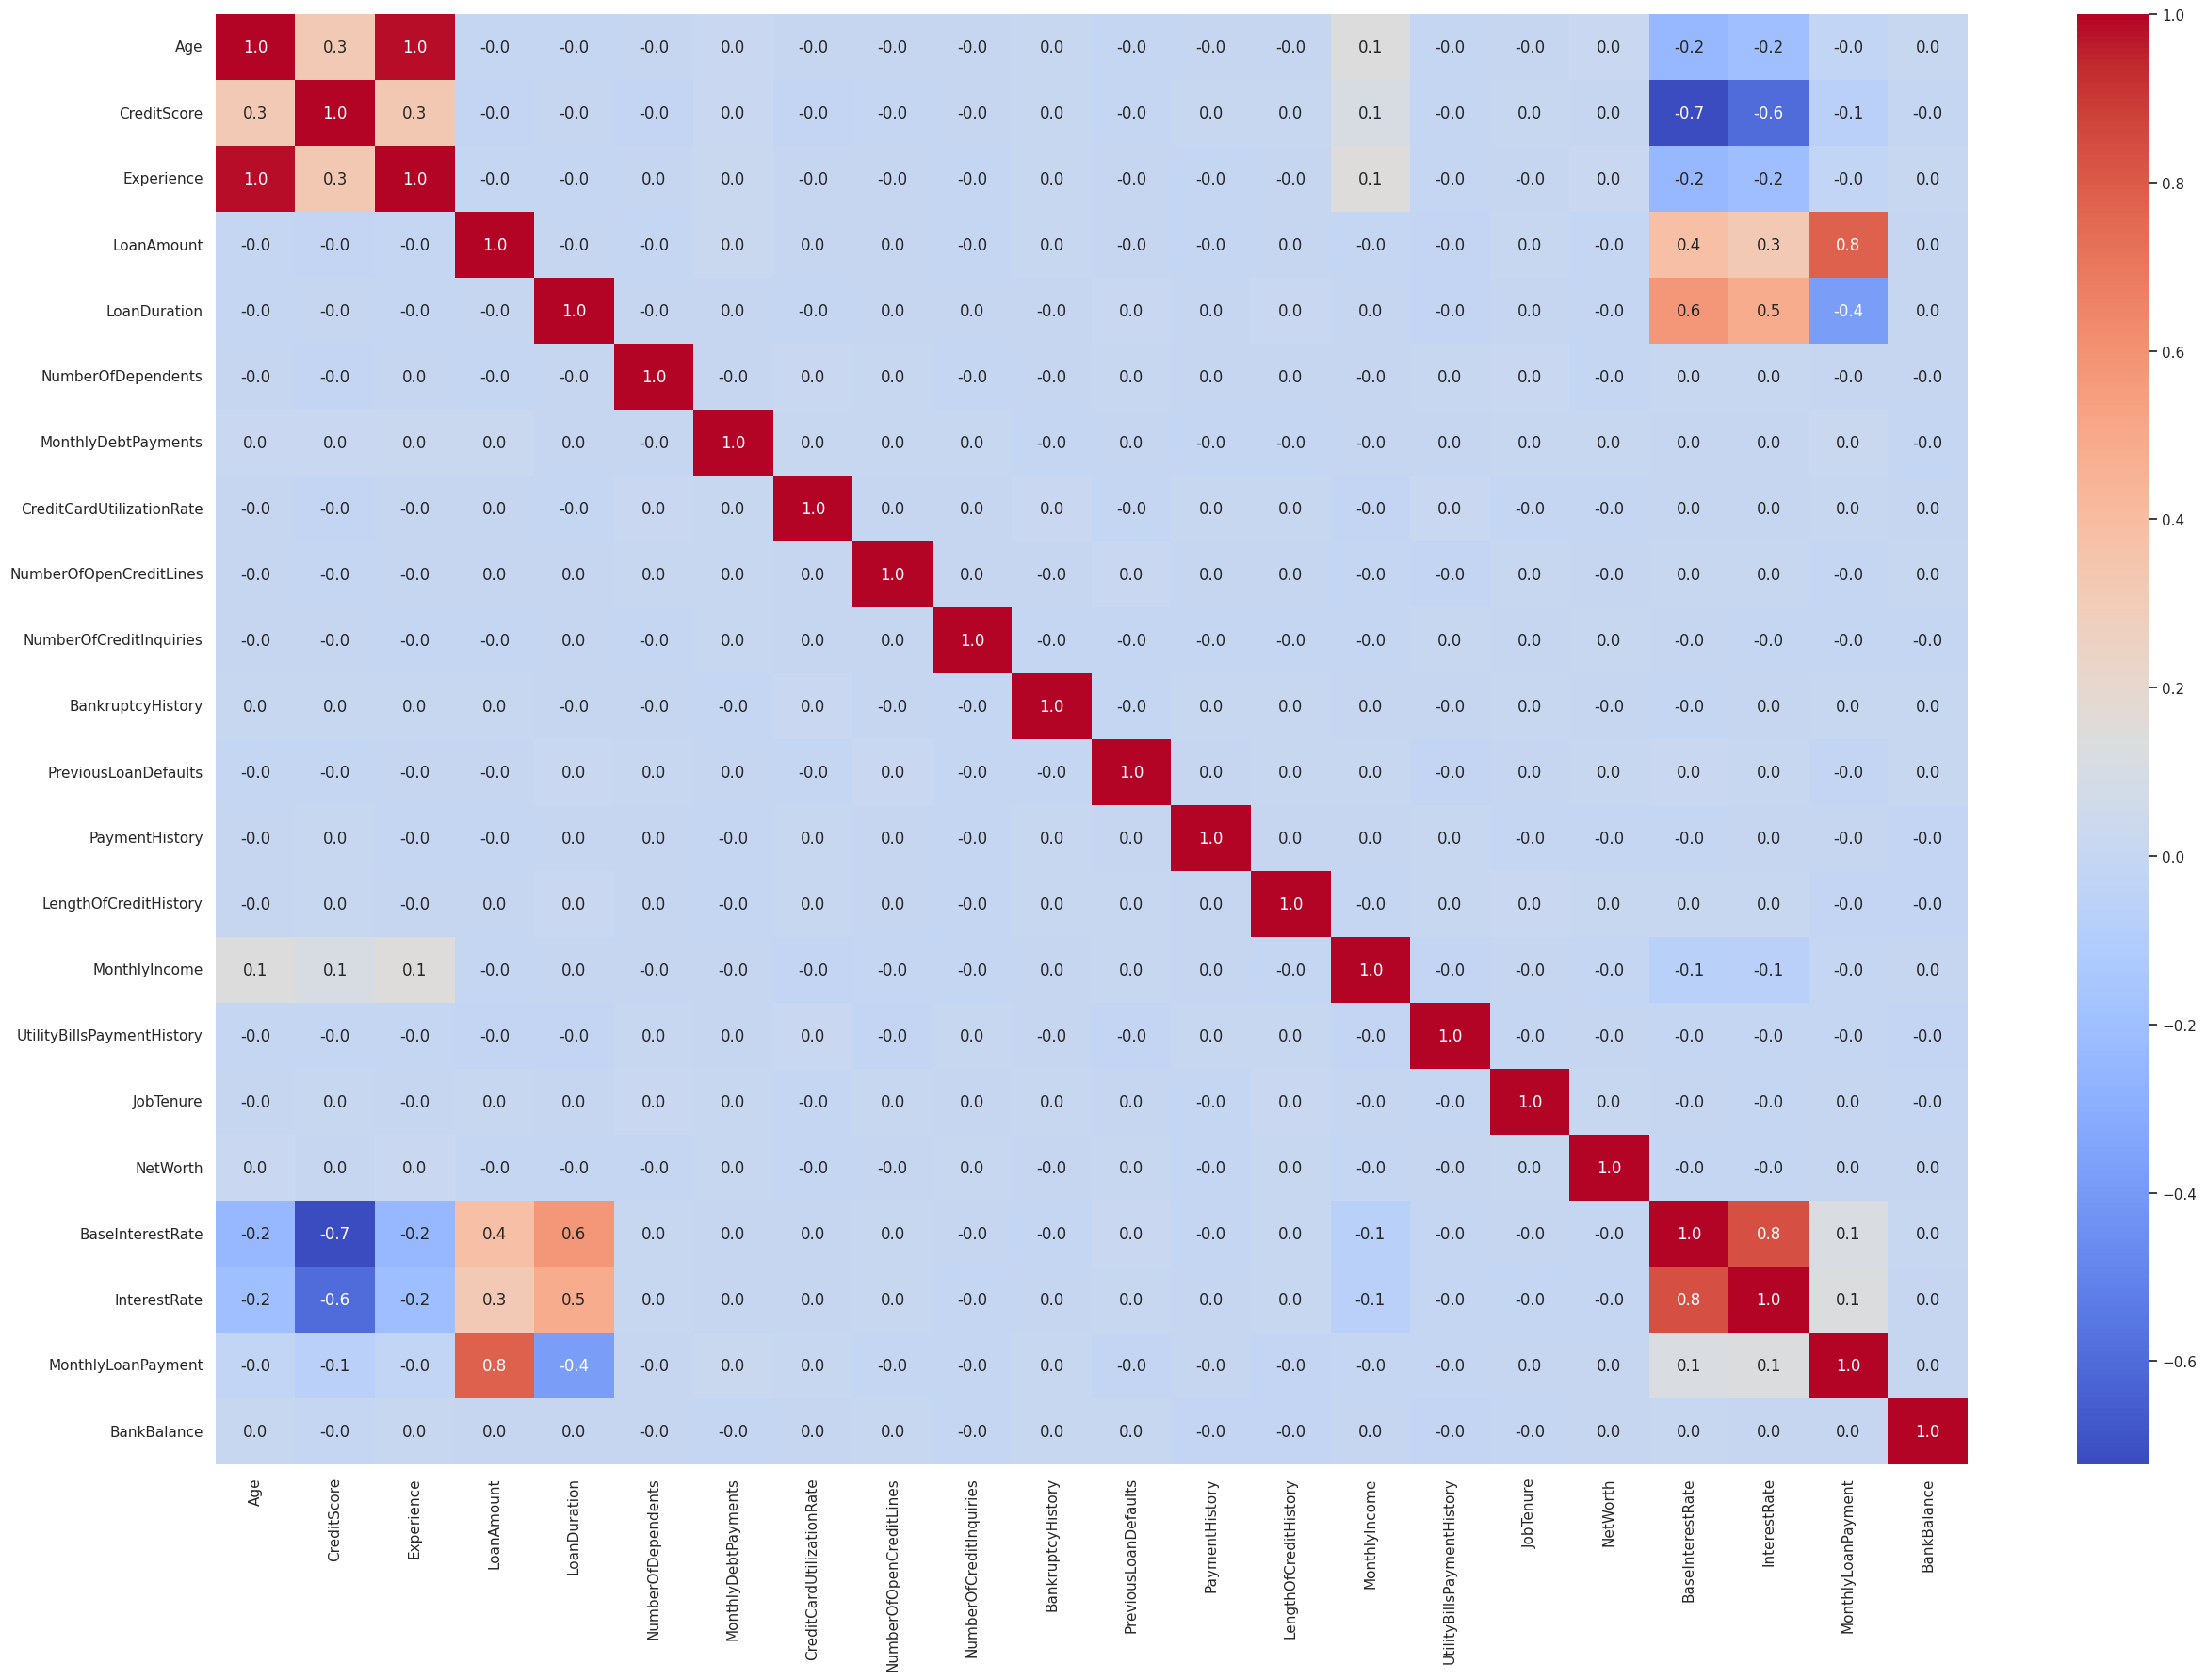

In [ ]:
plt.figure(figsize=(30, 20))
numeric_columns.corr()
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='0.01f',annot_kws=None)

> Finding highly correlated features

In [ ]:
correlation_matrix = numeric_columns.corr()

# Set the correlation threshold
threshold = 0.5

# Find pairs of features with high correlation
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # Check if the absolute correlation exceeds the threshold
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print all pairs of highly correlated features
print(highly_correlated_pairs)

[('Experience', 'Age'), ('BaseInterestRate', 'CreditScore'), ('BaseInterestRate', 'LoanDuration'), ('InterestRate', 'CreditScore'), ('InterestRate', 'BaseInterestRate'), ('MonthlyLoanPayment', 'LoanAmount')]


Features with a correlation value of 0.5 or higher (positive or negative) should be considered for removal, as they are highly correlated.

In [ ]:
loan_df.drop(['Experience','BaseInterestRate','MonthlyLoanPayment'], axis=1, inplace=True)


> Considering correlation of each feature with the target

In [ ]:
# Step 1: Calculate the correlation of each feature with the target
corr_with_target = loan_df_original.corr(numeric_only=True)['LoanApproved'].sort_values(ascending=False)

# Step 2: Set the threshold for low correlation (-0.1 to 0.1)
low_corr_features = corr_with_target[(corr_with_target > -0.05) & (corr_with_target < 0.05)]

# Step 3: Print the list of features with low correlation
print("Features with correlation between -0.05 and 0.05:")
print(low_corr_features)


Features with correlation between -0.05 and 0.05:
PaymentHistory                0.030804
JobTenure                     0.004997
UtilityBillsPaymentHistory    0.003303
NumberOfDependents            0.001717
SavingsAccountBalance         0.000961
CheckingAccountBalance        0.000660
DebtToIncomeRatio             0.000034
NumberOfOpenCreditLines      -0.004769
NumberOfCreditInquiries      -0.005885
CreditCardUtilizationRate    -0.010466
TotalLiabilities             -0.029434
Name: LoanApproved, dtype: float64


Below features are very less correlated with the tagtet variable:-

JobTenure,
UtilityBillsPaymentHistory,
NumberOfDependents,
BankBalance,
DebtToIncomeRatio,
NumberOfOpenCreditLines,
NumberOfCreditInquiries,
MaritalStatus,
LoanPurpose

In [ ]:
# Step 1: Calculate the correlation of each feature with the target
corr_with_target = loan_df_original.corr(numeric_only=True)['RiskScore'].sort_values(ascending=False)

# Step 2: Set the threshold for low correlation (-0.1 to 0.1)
low_corr_features = corr_with_target[(corr_with_target > -0.05) & (corr_with_target < 0.05)]

# Step 3: Print the list of features with low correlation
print("Features with correlation between -0.1 and 0.1:")
print(low_corr_features)


Features with correlation between -0.1 and 0.1:
MonthlyDebtPayments           0.036938
NumberOfOpenCreditLines       0.007762
NumberOfCreditInquiries       0.003103
SavingsAccountBalance         0.002190
NumberOfDependents            0.001686
CheckingAccountBalance       -0.004044
JobTenure                    -0.004393
UtilityBillsPaymentHistory   -0.005196
PaymentHistory               -0.016992
Name: RiskScore, dtype: float64


The goal is to retain features that are strongly correlated with the target variable (either positively or negatively) and remove those that have little or no relationship.

In [ ]:
loan_df.drop(['JobTenure', 'UtilityBillsPaymentHistory', 'NumberOfDependents',  'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'MaritalStatus', 'LoanPurpose'], axis=1, inplace=True)

In [ ]:
loan_df.drop(['MonthlyDebtPayments', 'HomeOwnershipStatus', 'PaymentHistory','BankBalance'], axis=1, inplace=True)

In [ ]:
loan_df.shape

(20000, 15)

In [ ]:
# correlation with the target variable
#loan_df.corr()['RiskScore'].sort_values(ascending=False)

In [ ]:
#loan_df.drop(['LoanDuration'], axis=1, inplace=True)

In [ ]:
#loan_df.drop('EducationLevel', axis=1, inplace=True)

In [ ]:
#loan_df.drop(['Age'], axis=1, inplace=True)

In [ ]:
loan_df.shape

(20000, 15)

## (2.6) Scaling

> Standardization and Normalization are two common techniques used in data preprocessing to scale features



 (2.6.1) Standardization:

> Standardization transforms data to have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of the data and dividing by the standard deviation.


> Standardization is useful when your data follows a normal distribution or if using machine learning algorithms that assume normally distributed data (e.g., linear regression, logistic regression, SVM, etc.). It works well with algorithms that rely on the distance between data points (e.g., k-NN, PCA).





In [ ]:
# Create a copy of the original data for comparison
loan_scaled_df = loan_df.copy()

# Select numeric columns, excluding 'LoanApproved'
numeric_columns = loan_df.drop(columns=['LoanApproved','RiskScore']).select_dtypes(include=['number']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler only to the numeric columns
loan_scaled_df[numeric_columns] = scaler.fit_transform(loan_df[numeric_columns])
loan_scaled_df.head()

,Age,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,CreditCardUtilizationRate,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,MonthlyIncome,NetWorth,InterestRate,LoanApproved,RiskScore
0,0.451489,0.890021,0.391447,1.291655,-1.013086,-0.245578,0.425792,-0.235154,-0.333426,-0.711630,-0.295362,1.020941,-0.272968,0,49.0
1,-0.150795,1.105724,0.391447,-0.380823,0.362494,-0.245578,-1.242602,-0.235154,-0.333426,-0.711630,-0.305463,0.287206,-0.901165,0,52.0
2,0.623571,-0.031618,0.391447,0.455416,-0.412822,-0.732113,-0.932273,-0.235154,-0.333426,0.841287,-0.263022,-1.172566,-0.629370,0,52.0
3,1.570017,-0.521852,0.391447,-1.217062,1.082277,1.700559,-0.117617,-0.235154,-0.333426,-0.592175,0.599771,0.853401,1.464331,0,54.0
4,-0.236835,0.439006,0.391447,-0.380823,-1.772439,-0.732113,0.213746,-0.235154,-0.333426,1.438563,1.225003,1.420252,-1.495584,1,36.0


## (2.7) Handling Outliers

### Boxplots

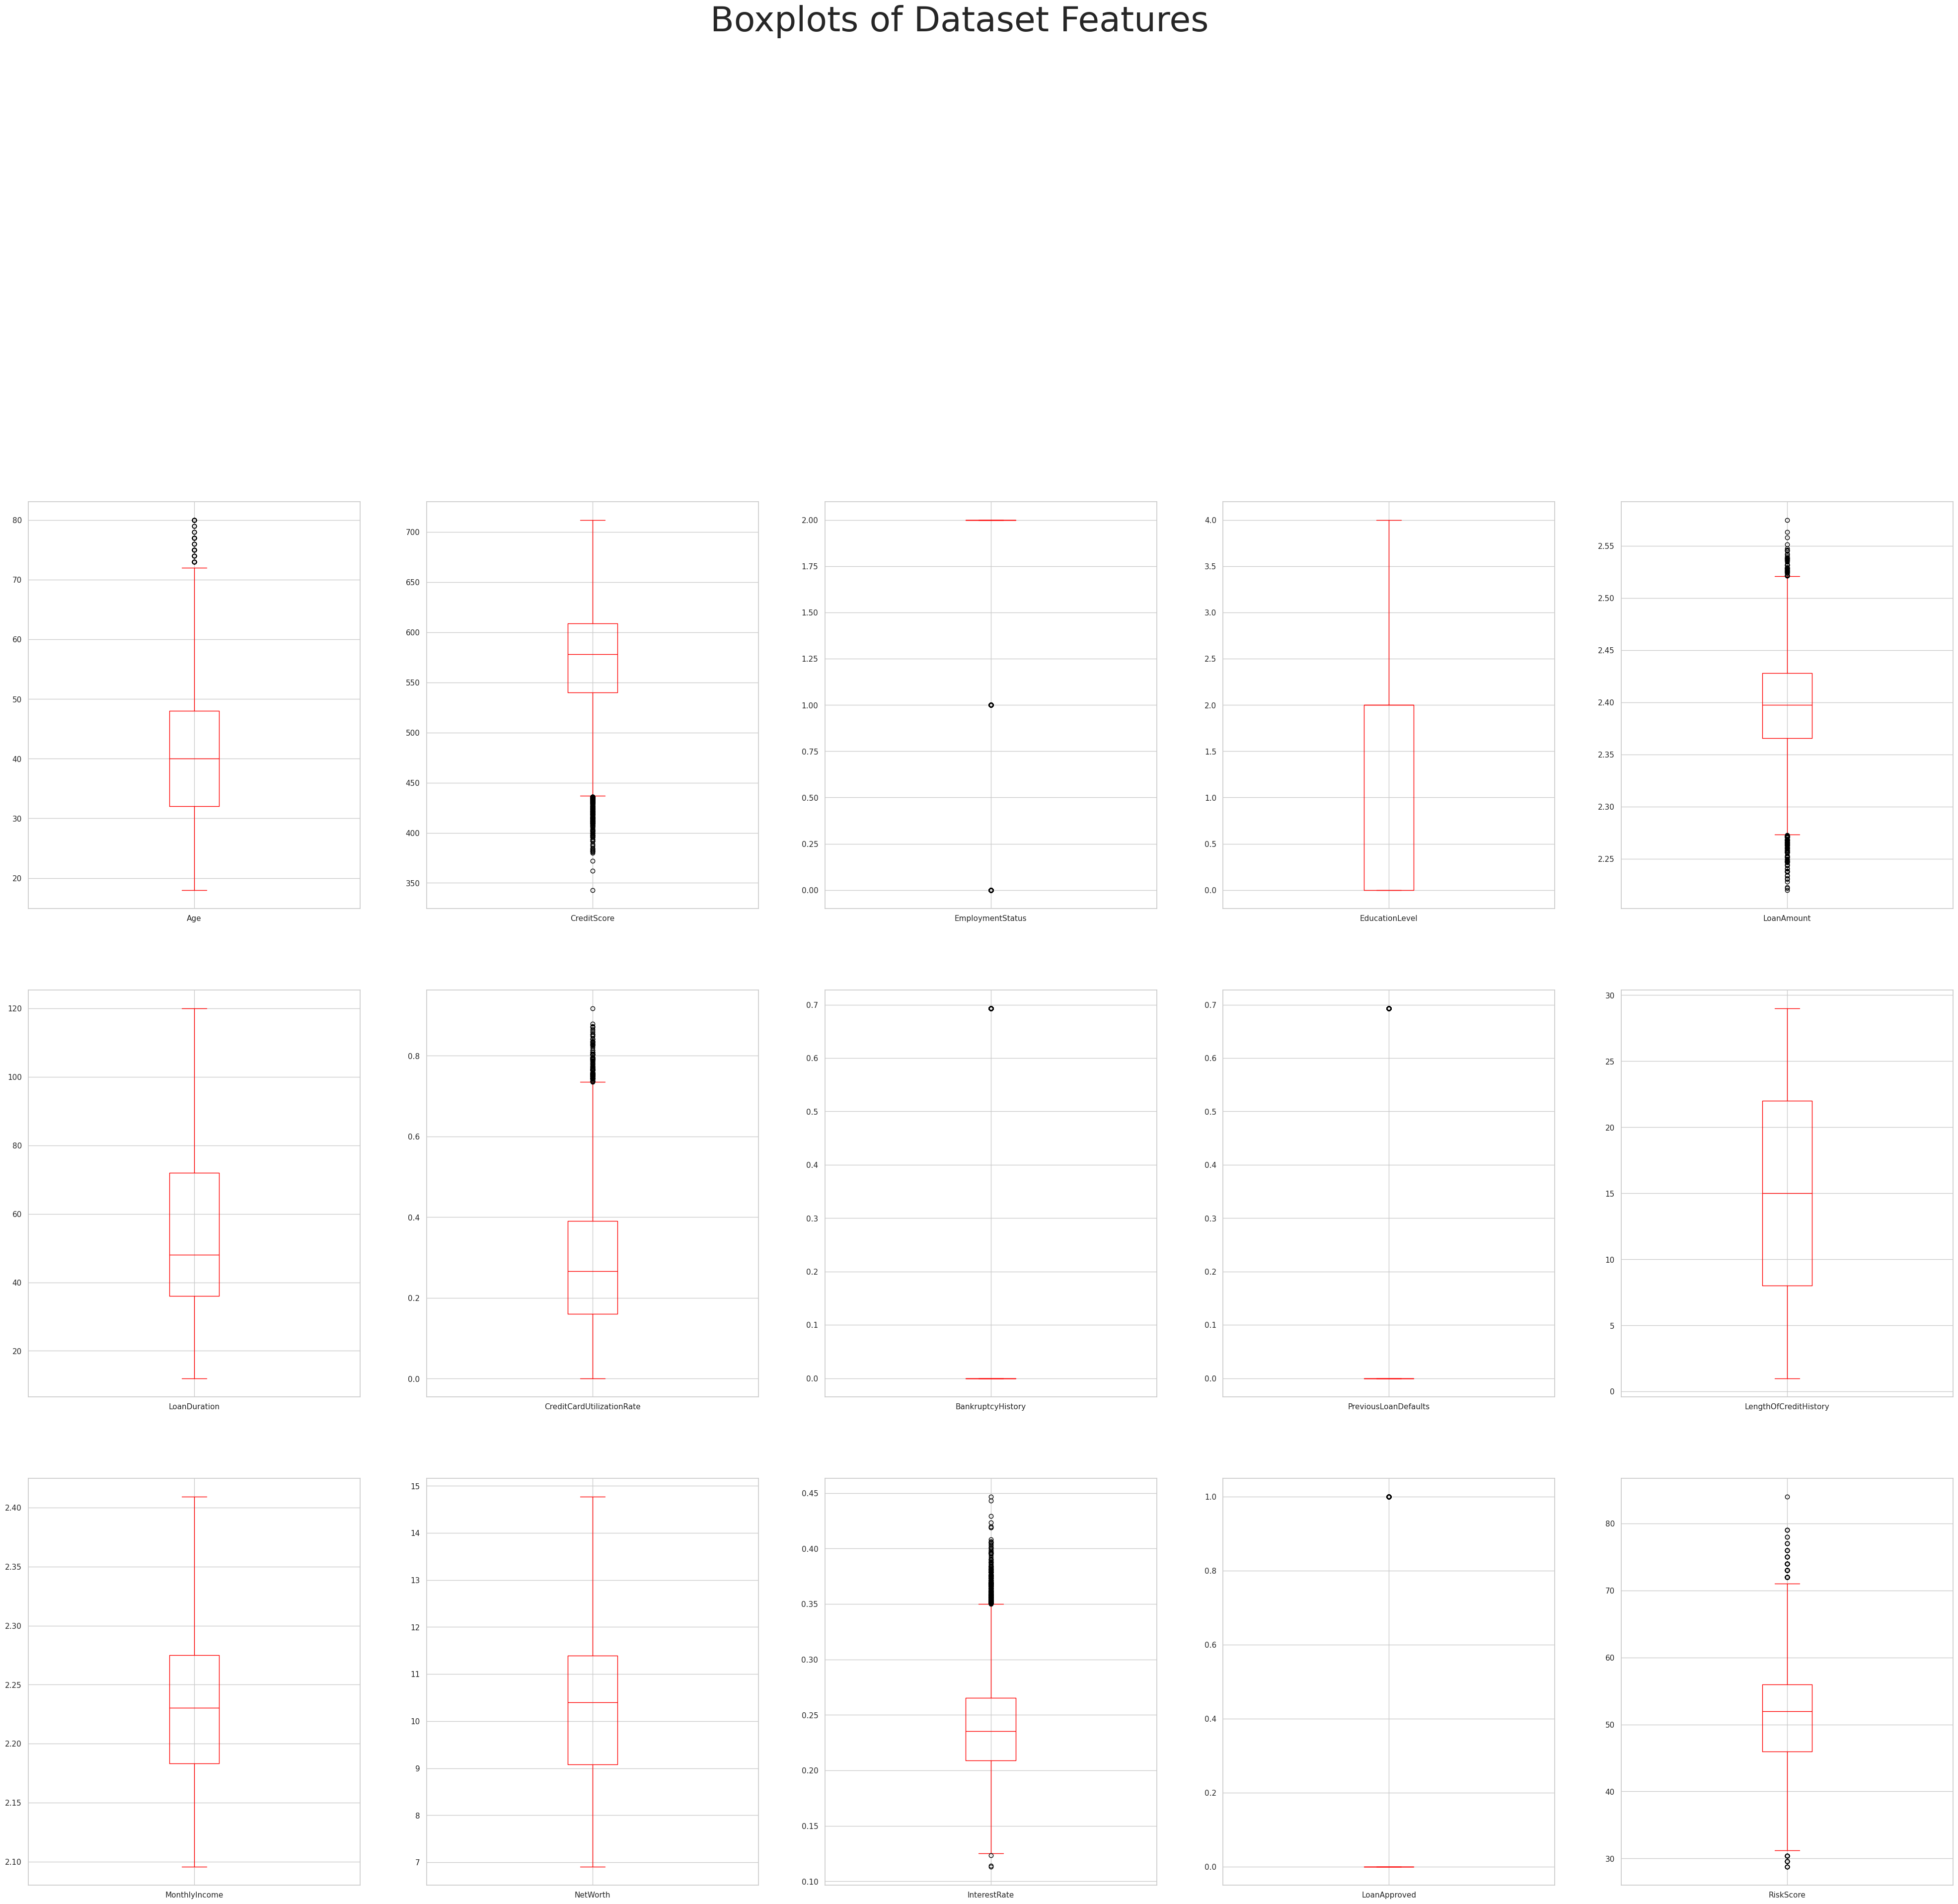

In [ ]:
loan_df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(50, 100), color='red')
plt.suptitle('Boxplots of Dataset Features', fontsize=50)
plt.show()

In [ ]:
# Create a copy of the original data for comparison
loan_df_copy = loan_df.copy()

# Define the columns to exclude: target + categorical
categorical_columns = loan_df_original.select_dtypes(include=['object', 'category']).columns.tolist()
target_columns = ['LoanApproved', 'RiskScore']
exclude_columns = categorical_columns + target_columns

def remove_outliers_iqr(df, exclude_columns):
    # Loop through numeric columns
    for column in df.select_dtypes(include=['number']).columns:
        if column in exclude_columns:
            continue  # Skip excluded columns

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

# Remove outliers
loan_df = remove_outliers_iqr(loan_df, exclude_columns)
loan_scaled_df = remove_outliers_iqr(loan_scaled_df, exclude_columns)

# Print summary
print("Shape before removing outliers:", loan_df_copy.shape)
print("Shape after removing outliers:", loan_df.shape)
print("Number of rows removed:", loan_df_copy.shape[0] - loan_df.shape[0])


Shape before removing outliers: (20000, 15)
Shape after removing outliers: (16391, 15)
Number of rows removed: 3609


# Step 3. Model Training and Evaluattion

## x & y, train & test splitting

> For Regression

In [ ]:
x1=loan_df.drop(['LoanApproved', 'RiskScore'],axis=1)
y1=loan_df[['RiskScore']]
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.2)


In [ ]:
print('Shape of Training Features: ',x1_train.shape)
print("Shape of Testing Features: ",x1_test.shape)
print("Shape of Training Target: ",y1_train.shape)
print("Shape of Testig Target: ",y1_test.shape)

Shape of Training Features:  (13112, 13)
Shape of Testing Features:  (3279, 13)
Shape of Training Target:  (13112, 1)
Shape of Testig Target:  (3279, 1)


> For Regression on scaled data

In [ ]:
x1s=loan_scaled_df.drop(['LoanApproved', 'RiskScore'],axis=1)
y1s=loan_scaled_df[['RiskScore']]
x1s_train,x1s_test,y1s_train,y1s_test=train_test_split(x1s,y1s,random_state=42,test_size=0.2)

> For Classification

In [ ]:
# Convert 'LoanApproved' from float to int
loan_df['LoanApproved'] = loan_df['LoanApproved'].astype(int)

x=loan_df[['RiskScore']]
y=loan_df[['LoanApproved']]

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

> For Classification on scaled data

In [ ]:
x2s=loan_scaled_df[['RiskScore']]
y2s=loan_scaled_df[['LoanApproved']]

x2s_train,x2s_test,y2s_train,y2s_test=train_test_split(x2s,y2s,random_state=42,test_size=0.2)


## (3.1) Regression Modeling

> **Risk Score Regression**: To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.



In [ ]:
models = {
    "Linear_Regression": LinearRegression(),
    "RandomForest_Regressor": RandomForestRegressor(),
    "GradientBoosting_Regressor": GradientBoostingRegressor(),
    "DecisionTree_Regressor": DecisionTreeRegressor(),
    "SVM": SVR(),
    #"MLP_Regressor": MLPRegressor(max_iter=500),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'ExtraTreesRegressor' : ExtraTreesRegressor(),
    'BaggingRegressor': BaggingRegressor(),
    'LGBMRegressor':LGBMRegressor(),
    #'CatBoostRegressor':CatBoostRegressor(),
    'XGBRegressor': XGBRegressor()
}

In [ ]:
# Dictionary to store results for unscaled data
results1 = {'Model': [], 'MSE': [], 'MAE': [], 'R²': []}

# Loop through models on unscaled data
for model_name, model in models.items():
    model.fit(x1_train, y1_train.values.ravel())  # Fix warning with .values.ravel()
    y1_pred = model.predict(x1_test)

    mse = mean_squared_error(y1_test, y1_pred)
    mae = mean_absolute_error(y1_test, y1_pred)
    r2 = r2_score(y1_test, y1_pred)

    results1['Model'].append(f"{model_name} (Unscaled)")
    results1['MSE'].append(mse)
    results1['MAE'].append(mae)
    results1['R²'].append(r2)

results_df1 = pd.DataFrame(results1)

# Dictionary to store results for scaled data
results2 = {'Model': [], 'MSE': [], 'MAE': [], 'R²': []}

# Loop through models on scaled data
for model_name, model in models.items():
    model.fit(x1s_train, y1s_train.values.ravel())  # Fix warning here as well
    y1s_pred = model.predict(x1s_test)

    mse1 = mean_squared_error(y1s_test, y1s_pred)
    mae1 = mean_absolute_error(y1s_test, y1s_pred)
    r21 = r2_score(y1s_test, y1s_pred)

    results2['Model'].append(f"{model_name} (Scaled)")
    results2['MSE'].append(mse1)
    results2['MAE'].append(mae1)
    results2['R²'].append(r21)

results_df2 = pd.DataFrame(results2)

# Combine both results
final_results = pd.concat([results_df1, results_df2], ignore_index=True)
# Sort by result
final_results = final_results.sort_values(by='R²', ascending=False)

# Display with background gradient
final_results.style.background_gradient(cmap='Blues', subset=['MSE', 'MAE', 'R²'])


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1618
[LightGBM] [Info] Number of data points in the train set: 13112, number of used features: 11
[LightGBM] [Info] Start training from score 49.319265
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1596
[LightGBM] [Info] Number of data points in the train set: 13089, number of used features: 11
[LightGBM] [Info] Start training from score 49.365742


,Model,MSE,MAE,R²
18,LGBMRegressor (Scaled),12.344056,2.791086,0.743001
8,LGBMRegressor (Unscaled),12.147909,2.773521,0.737886
12,GradientBoosting_Regressor (Scaled),13.089817,2.860493,0.727474
16,ExtraTreesRegressor (Scaled),13.160329,2.843459,0.726006
6,ExtraTreesRegressor (Unscaled),12.788139,2.821319,0.724072
2,GradientBoosting_Regressor (Unscaled),13.043362,2.869515,0.718565
1,RandomForest_Regressor (Unscaled),13.102081,2.838923,0.717298
11,RandomForest_Regressor (Scaled),13.595445,2.877275,0.716947
19,XGBRegressor (Scaled),13.930209,2.927287,0.709978
14,SVM (Scaled),14.092926,2.996920,0.706590


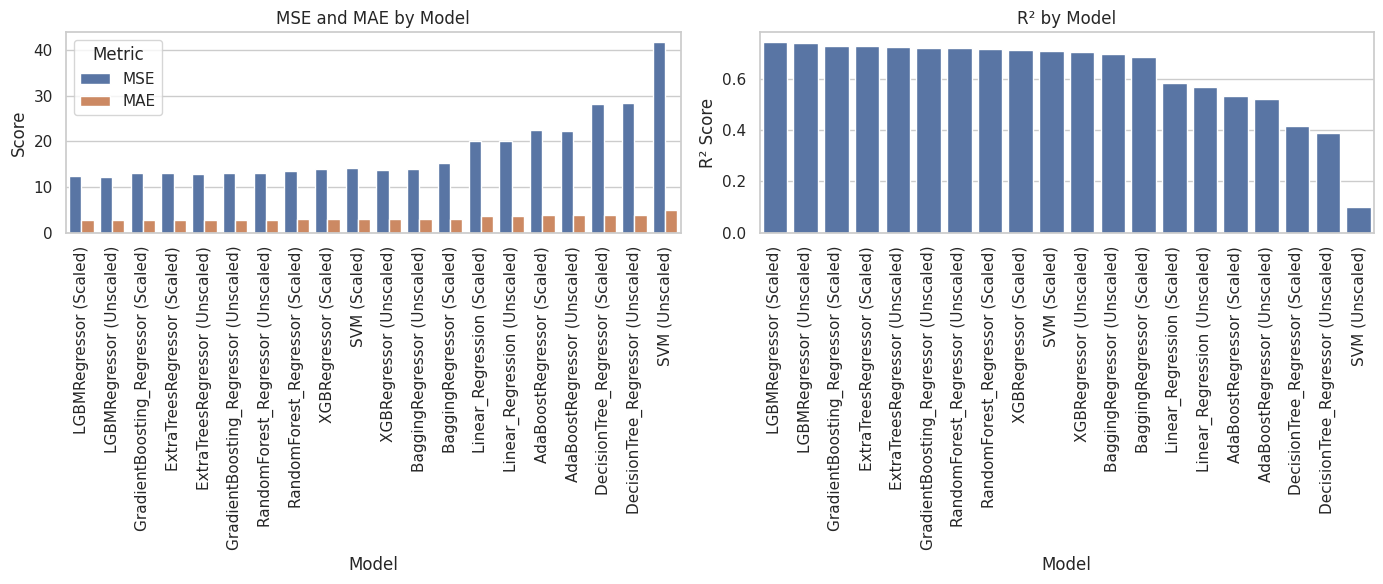

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Plot MSE and MAE in a grouped bar chart
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# MSE and MAE grouped bar plot
results_melt = final_results.melt(id_vars='Model', value_vars=['MSE', 'MAE'], var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melt, ax=ax[0])
ax[0].set_title('MSE and MAE by Model')
ax[0].set_ylabel('Score')
ax[0].set_xlabel('Model')
ax[0].legend(title='Metric')

# Plot R² separately
sns.barplot(x='Model', y='R²', data=final_results, ax=ax[1])
ax[1].set_title('R² by Model')
ax[1].set_ylabel('R² Score')
ax[1].set_xlabel('Model')

# Rotate the x-axis labels if necessary
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), rotation=90)

# Show the plot
plt.tight_layout()
plt.show()



Based on the analysis of the loan approval dataset for predicting the RiskScore, the **LGBMRegressor** (on Scaled data)	 model demonstrated the best performance among the tested models.

## (3.2) Classification Modeling



> **Binary Loan Approval Classification**: To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.





In [ ]:
clas_models = {'lr':LogisticRegression(max_iter=500),
'rfc':  RandomForestClassifier(),
'dtc':DecisionTreeClassifier(),
'knn':KNeighborsClassifier(n_neighbors=11),
'svm':SVC(kernel='linear'),
'gbc': GradientBoostingClassifier(random_state = 0, learning_rate=0.45),
'etc': ExtraTreesClassifier(),
'nb':GaussianNB()}

In [ ]:
loan_df[['LoanApproved']].value_counts()

,count
LoanApproved,
0,12154
1,4237


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Results for original data
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

# Evaluate each model on original data
for model_name, model in clas_models.items():
    model.fit(x_train, y_train.values.ravel())  # .ravel() to avoid warnings
    model_pred = model.predict(x_test)

    results['Model'].append(model)
    results['Accuracy'].append(accuracy_score(y_test, model_pred))
    results['Precision'].append(precision_score(y_test, model_pred))
    results['Recall'].append(recall_score(y_test, model_pred))
    results['F1-Score'].append(f1_score(y_test, model_pred))


results_df = pd.DataFrame(results)

# Sort by F1-Score
results_df = results_df.sort_values(by='F1-Score', ascending=False)

# Display
results_df.style.background_gradient(cmap='Blues', subset=['Accuracy', 'Precision', 'Recall', 'F1-Score'])


,Model,Accuracy,Precision,Recall,F1-Score
1,RandomForestClassifier(),0.992986,0.973494,0.998764,0.985967
2,DecisionTreeClassifier(),0.992986,0.973494,0.998764,0.985967
6,ExtraTreesClassifier(),0.992986,0.973494,0.998764,0.985967
5,"GradientBoostingClassifier(learning_rate=0.45, random_state=0)",0.992986,0.973494,0.998764,0.985967
3,KNeighborsClassifier(n_neighbors=11),0.992376,0.972289,0.997528,0.984747
0,LogisticRegression(max_iter=500),0.966148,0.937343,0.924598,0.930927
7,GaussianNB(),0.966148,0.937343,0.924598,0.930927
4,SVC(kernel='linear'),0.962184,0.901524,0.950556,0.925391


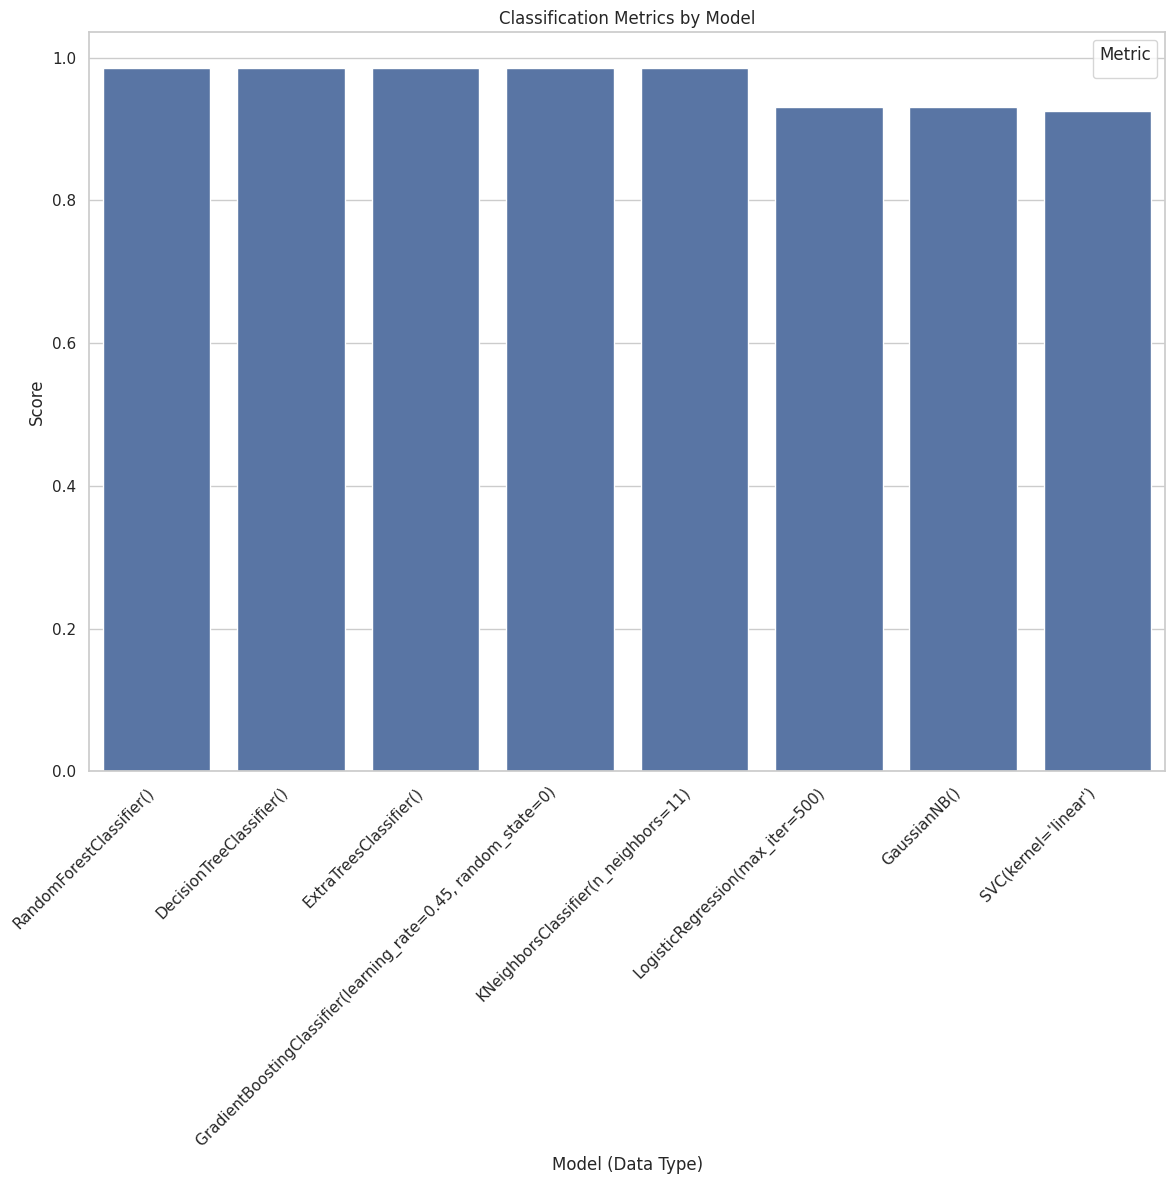

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Grouped bar plot for Accuracy, Precision, Recall, F1-Score
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot grouped bar chart
sns.barplot(x='Model', y='F1-Score',  data=results_df, ax=ax)

# Customize plot
ax.set_title('Classification Metrics by Model')
ax.set_ylabel('Score')
ax.set_xlabel('Model (Data Type)')
ax.legend(title='Metric')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Layout and show
plt.tight_layout()
plt.show()


Based on the evaluation of the classification models for predicting loan approval, the **RandomForestClassifier()** emerged as the best-performing model. It achieved the highest accuracy and consistently strong results across precision, recall, and F1-score, making it the most reliable model for classifying whether a loan is approved or not in the loan dataset.

# Step 4. Documentation or Reporting

In [ ]:
import lightgbm as lgb

# Initialize and train the LightGBM Regressor
r_model = lgb.LGBMRegressor(random_state=42)
r_model.fit(x1s_train, y1s_train.values.ravel())

# Predict on test data
y1s_pred = r_model.predict(x1s_test)

# Evaluation metrics
mse = mean_squared_error(y1s_test, y1s_pred)
mae = mean_absolute_error(y1s_test, y1s_pred)
r2= r2_score(y1s_test, y1s_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"r2 score: {r2:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1596
[LightGBM] [Info] Number of data points in the train set: 13089, number of used features: 11
[LightGBM] [Info] Start training from score 49.365742
Mean Squared Error (MSE): 12.3441
Mean Absolute Error (MAE): 2.7911
r2 score: 0.7430


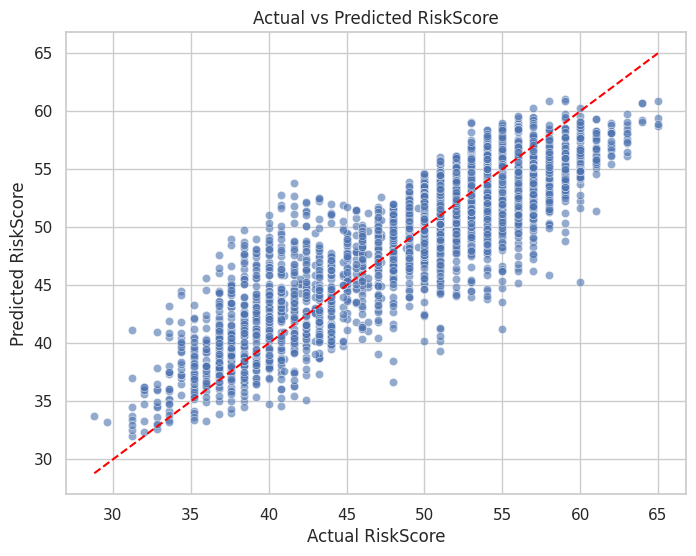

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y1s_test.values.ravel(), y=y1s_pred, alpha=0.6)
plt.plot([y1s_test.min(), y1s_test.max()], [y1s_test.min(), y1s_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted RiskScore')
plt.xlabel('Actual RiskScore')
plt.ylabel('Predicted RiskScore')
plt.grid(True)
plt.show()


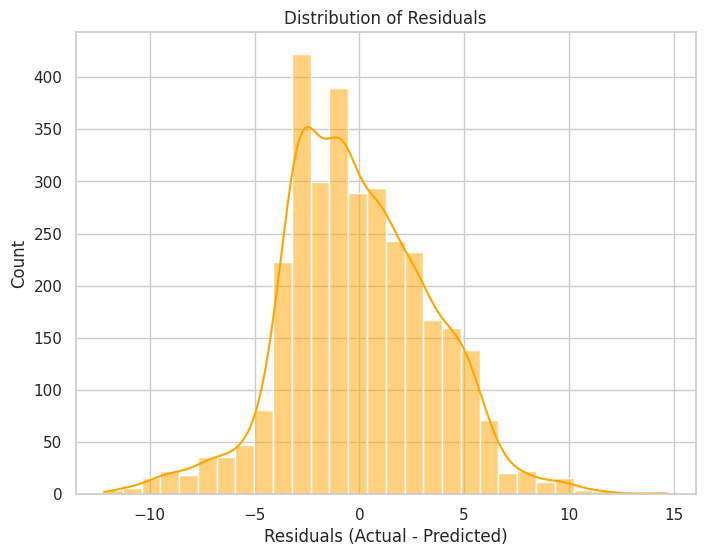

In [ ]:
residuals = y1s_test.values.ravel() - y1s_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
c_model = RandomForestClassifier(random_state=42)
c_model.fit(x_train, y_train)

# Predict on test data
y_pred = c_model.predict(x_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Accuracy:  0.9930
Precision: 0.9735
Recall:    0.9988
F1 Score:  0.9860


Accuracy:  0.9930
Precision: 0.9735
Recall:    0.9988
F1 Score:  0.9860


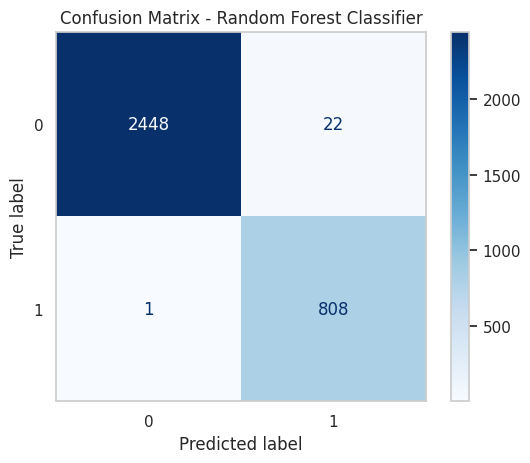

In [ ]:
from sklearn.metrics import confusion_matrix # Import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay



# Initialize and train model
c_model = RandomForestClassifier(random_state=42)
c_model.fit(x_train, y_train)

# Predict on test data
y_pred = c_model.predict(x_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c_model.classes_) # using c_model for display_labels
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.grid(False)
plt.show()

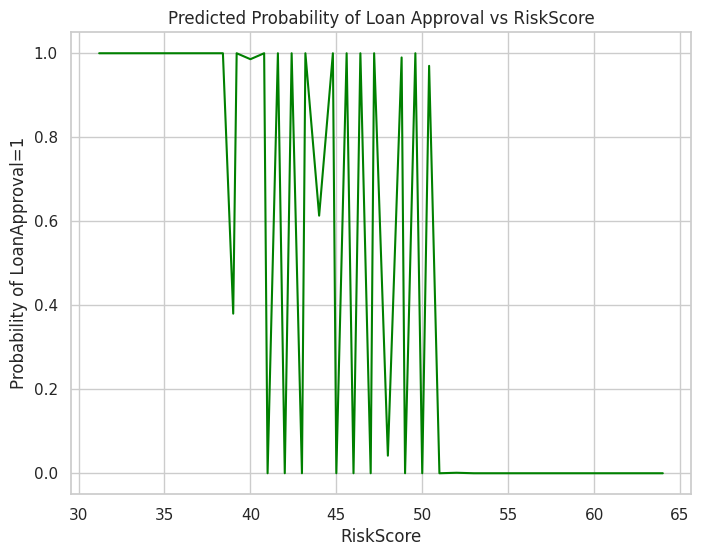

In [ ]:
# Predict probabilities
y_proba = c_model.predict_proba(x_test)[:, 1]

# Sort for better visualization
sorted_idx = x_test['RiskScore'].argsort()
plt.figure(figsize=(8, 6))
plt.plot(x_test['RiskScore'].iloc[sorted_idx], y_proba[sorted_idx], color='green')
plt.title('Predicted Probability of Loan Approval vs RiskScore')
plt.xlabel('RiskScore')
plt.ylabel('Probability of LoanApproval=1')
plt.grid(True)
plt.show()


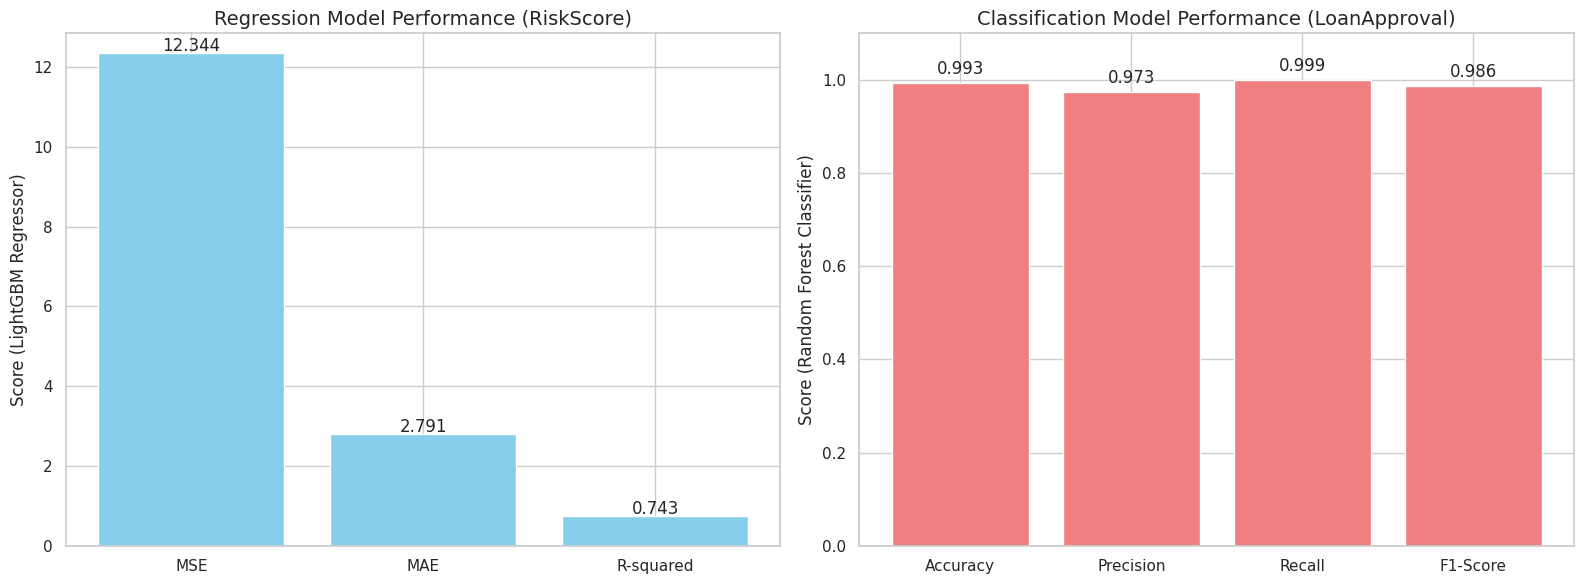

In [ ]:
# Create a figure with 2 subplots: one for regression and one for classification
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# --------------- Regression Metrics Bar Chart ----------------- #
# Regression metrics (MSE, MAE, R-squared)
regression_metrics = ['MSE', 'MAE', 'R-squared']
regression_values = [mse, mae, r2]

# Bar chart for regression metrics
axs[0].bar(regression_metrics, regression_values, color='skyblue')
axs[0].set_title('Regression Model Performance (RiskScore)', fontsize=14)
axs[0].set_ylabel('Score (LightGBM Regressor)', fontsize=12)
axs[0].set_ylim(0, max(regression_values) + 0.5)  # Adjust y-axis for better visibility
for i, v in enumerate(regression_values):
    axs[0].text(i, v + 0.05, f'{v:.3f}', ha='center', fontsize=12)

# --------------- Classification Metrics Bar Chart ----------------- #
# Classification metrics (Accuracy, Precision, Recall, F1-Score)
classification_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
classification_values = [accuracy, precision, recall, f1]

# Bar chart for classification metrics
axs[1].bar(classification_metrics, classification_values, color='lightcoral')
axs[1].set_title('Classification Model Performance (LoanApproval)', fontsize=14)
axs[1].set_ylabel('Score (Random Forest Classifier)', fontsize=12)
axs[1].set_ylim(0, 1.1)  # Classification scores are usually between 0 and 1
for i, v in enumerate(classification_values):
    axs[1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontsize=12)

# Add some space between subplots for clarity
plt.tight_layout()

# Show the plots
plt.show()

## ✅ FINAL PROJECT REPORT: **Loan Approval Prediction and Risk Score Modeling**

### 🎯 Objective:

Build two models:

1. **LGBM Regressor** to predict `RiskScore` (regression task).
2. **Random Forest Classifier** to predict `LoanApproved` (classification task).

---

### 📌 Dataset Overview:

* Source: `Loan.csv`: https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval/data
* Original target variables: `LoanApproved` (classification), `RiskScore` (regression).
* Contains demographic, financial, and loan-related features.

---

### 🧹 (2.2) Feature Engineering:

1. Dropped redundant or high-collinearity columns:

   * `'AnnualIncome'`, `'TotalAssets'`, `'TotalLiabilities'`, `'DebtToIncomeRatio'`, `'TotalDebtToIncomeRatio'`, etc.
2. Created new feature:

   * `BankBalance = SavingsAccountBalance + CheckingAccountBalance`
3. Date processing:

   * Extracted `'year'`, `'month'`, `'day'` from `'ApplicationDate'` and dropped them.
4. Final cleanup:

   * Removed columns not useful for modeling (e.g., `'JobTenure'`, `'PaymentHistory'`, etc.)

---

### 🔤 (2.3) Encoding:

1. **Ordinal Encoding:**

   * `EmploymentStatus`, `EducationLevel`, `HomeOwnershipStatus`
2. **Target Encoding:**

   * `MaritalStatus` encoded using the mean of `RiskScore`
3. **Frequency Encoding:**

   * `LoanPurpose` encoded using normalized value counts

---

### 📏 (2.4) Skewness Handling:

* Applied `np.log1p()` transformation to features with high skewness (|skew| > 1)

---

### 🧼 (2.5) Outlier Removal:

* Used IQR method to remove outliers from numeric columns (excluding target & categorical features)

---

### ⚖️ (2.6) Feature Scaling:

* Used `StandardScaler` to normalize numeric features
* Saved scaled version in `loan_scaled_df`

---

### 🔍 (3.0) Model 1: **LGBMRegressor**

* Features: All processed and scaled numeric features
* Target: `RiskScore`
* Train-test split: 80-20
* **Evaluation:**

  * **MSE**, **MAE**
  * **Actual vs Predicted** plot
  * **Residual distribution** plot

---

### 🔍 (3.1) Model 2: **RandomForestClassifier**

* Feature: `RiskScore`
* Target: `LoanApproved` (converted to `int`)
* Train-test split: 80-20
* **Evaluation:**

  * Accuracy, Precision, Recall, F1 Score
  * Confusion Matrix
  * Probability curve for loan approval vs. RiskScore

---

## 📦 FINAL OUTPUT:

* Two models with complete preprocessing
* Visual and metric-based evaluation
* Clean and explainable workflow

---
> Based on the analysis of the loan approval dataset for predicting the RiskScore, the **LGBMRegressor** (on Scaled data)	 model demonstrated the best performance among the tested models.


> Based on the evaluation of the classification models for predicting loan approval, the **RandomForestClassifier()** emerged as the best-performing model. It achieved the highest accuracy and consistently strong results across precision, recall, and F1-score, making it the most reliable model for classifying whether a loan is approved or not in the loan dataset.
